# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib import ticker

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

from matplotlib.patches import FancyBboxPatch
#!pip install joypy
from joypy import joyplot

In [2]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Data fields
Here's a brief version of what you'll find in the data description file.
<p>
SalePrice - the property's sale price in dollars. <b> This is the target variable that you're trying to predict. </b>  <br>
MSSubClass: The building class   <br>
MSZoning: The general zoning classification   <br>
LotFrontage: Linear feet of street connected to property   <br>
LotArea: Lot size in square feet   <br>
Street: Type of road access   <br>
Alley: Type of alley access    <br>
LotShape: General shape of property   <br>
LandContour: Flatness of the property   <br>
Utilities: Type of utilities available   <br>
LotConfig: Lot configuration   <br>
LandSlope: Slope of property   <br>
Neighborhood: Physical locations within Ames city limits   <br>
Condition1: Proximity to main road or railroad   <br>
Condition2: Proximity to main road or railroad (if a second is present)   <br>
BldgType: Type of dwelling   <br>
HouseStyle: Style of dwelling   <br>
OverallQual: Overall material and finish quality <br>
OverallCond: Overall condition rating <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date <br>
RoofStyle: Type of roof <br>
RoofMatl: Roof material <br>
Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material) <br>
MasVnrType: Masonry veneer type <br>
MasVnrArea: Masonry veneer area in square feet <br>
ExterQual: Exterior material quality <br>
ExterCond: Present condition of the material on the exterior <br>
Foundation: Type of foundation <br>
BsmtQual: Height of the basement <br>
BsmtCond: General condition of the basement <br>
BsmtExposure: Walkout or garden level basement walls <br>
BsmtFinType1: Quality of basement finished area <br>
BsmtFinSF1: Type 1 finished square feet <br>
BsmtFinType2: Quality of second finished area (if present) <br>
BsmtFinSF2: Type 2 finished square feet <br>
BsmtUnfSF: Unfinished square feet of basement area <br>
TotalBsmtSF: Total square feet of basement area <br>
Heating: Type of heating <br>
HeatingQC: Heating quality and condition <br>
CentralAir: Central air conditioning <br>
Electrical: Electrical system <br>
1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
LowQualFinSF: Low quality finished square feet (all floors) <br>
GrLivArea: Above grade (ground) living area square feet <br>
BsmtFullBath: Basement full bathrooms <br>
BsmtHalfBath: Basement half bathrooms <br>
FullBath: Full bathrooms above grade <br>
HalfBath: Half baths above grade <br>
Bedroom: Number of bedrooms above basement level <br>
Kitchen: Number of kitchens <br>
KitchenQual: Kitchen quality <br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br>
Functional: Home functionality rating <br>
Fireplaces: Number of fireplaces <br>
FireplaceQu: Fireplace quality <br>
GarageType: Garage location <br>
GarageYrBlt: Year garage was built <br>
GarageFinish: Interior finish of the garage <br>
GarageCars: Size of garage in car capacity <br>
GarageArea: Size of garage in square feet <br>
GarageQual: Garage quality <br>
GarageCond: Garage condition <br>
PavedDrive: Paved driveway <br>
WoodDeckSF: Wood deck area in square feet <br>
OpenPorchSF: Open porch area in square feet <br>
EnclosedPorch: Enclosed porch area in square feet <br>
3SsnPorch: Three season porch area in square feet <br>
ScreenPorch: Screen porch area in square feet <br>
PoolArea: Pool area in square feet <br>
PoolQC: Pool quality <br>
Fence: Fence quality <br>
MiscFeature: Miscellaneous feature not covered in other categories <br>
MiscVal: $Value of miscellaneous feature <br>
MoSold: Month Sold <br>
YrSold: Year Sold <br>
SaleType: Type of sale <br>
SaleCondition: Condition of sale <br>
</p>

# Смотрим на данные

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.shape

(1460, 81)

# Делим на каттегориальные и численные

In [6]:
quantitative = train._get_numeric_data().columns.to_list()
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [7]:
len(quantitative)

36

# Смотрим на таргет

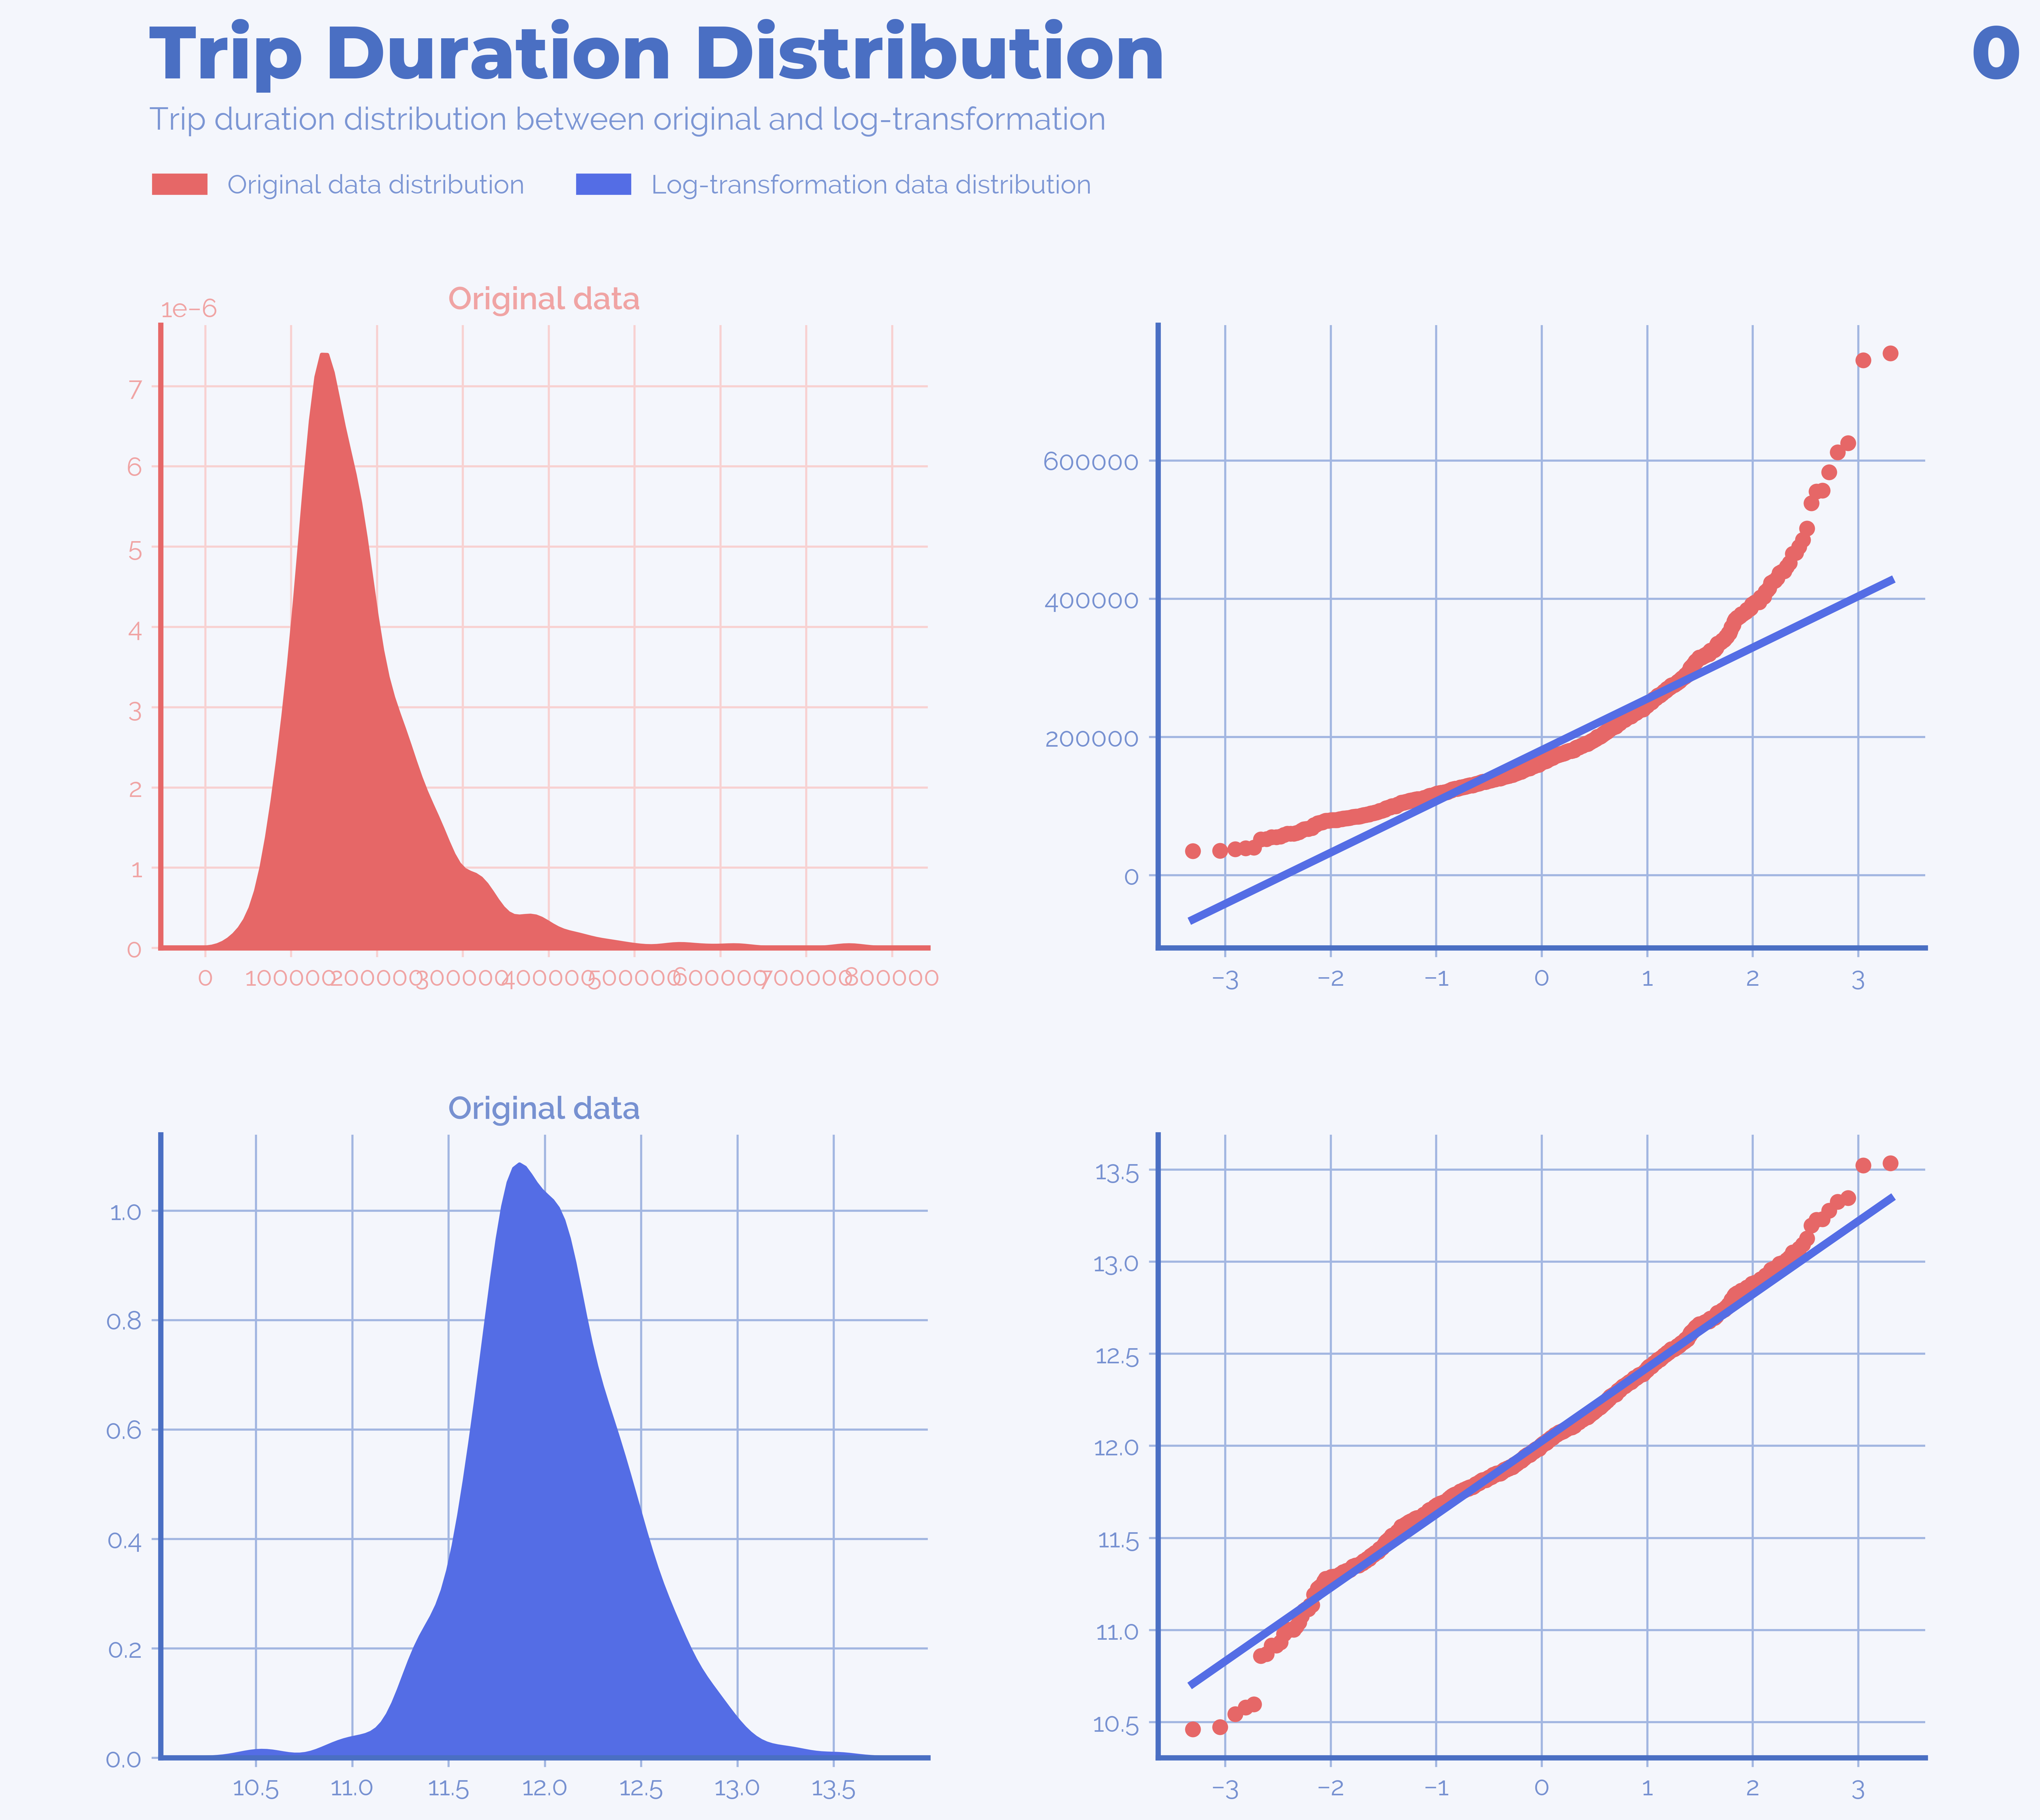

In [8]:
plt.rcParams['font.family'] = 'Raleway'
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(12, 10), facecolor = "#f4f6fc")
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f4f6fc"
color_map = ["#e66767"]
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.kdeplot(ax=ax0, data = train['SalePrice'], alpha=1, zorder=2, shade=True)
ax0_sns.set_title('Original data', fontsize=12, weight='bold', color='#f0a4a4')
ax0_sns.set_ylabel('')
ax0.tick_params(labelsize=10, color = '#f8d1d1', colors='#f0a4a4')
ax0.grid(which='major', axis='x', zorder=0, color='#f8d1d1')
ax0.grid(which='major', axis='y', zorder=0, color='#f8d1d1')
ax0.spines['bottom'].set_color("#e66767")
ax0.spines['left'].set_color("#e66767")
ax0.spines['left'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0_sns.get_legend().remove()

color_map = ['#546de5']
sns.set_palette(sns.color_palette(color_map))
ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.kdeplot(ax=ax1, data = np.log(train['SalePrice']), zorder=2, alpha=1, shade=True)
ax1_sns.set_title('Original data', fontsize=12, weight='bold', color='#7791d1')
ax1_sns.set_ylabel('')
ax1.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax1.grid(which='major', axis='x', zorder=0, color='#a2b6e1')
ax1.grid(which='major', axis='y', zorder=0, color='#a2b6e1')
ax1.spines['bottom'].set_color('#4a6fc3')
ax1.spines['left'].set_color('#4a6fc3')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1_sns.get_legend().remove()

ax01 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax01.spines[s].set_visible(False)
ax01.set_facecolor(background_color)
res = stats.probplot(train['SalePrice'], plot=ax01)
ax01.get_lines()[0].set_marker("o")
ax01.get_lines()[0].set_markeredgewidth(0)
ax01.get_lines()[0].set_markerfacecolor("#e66767")
ax01.get_lines()[1].set_color('#546de5')
ax01.get_lines()[1].set_linewidth(3)
ax01.set_ylabel('')
ax01.set_title('')
ax01.set_xlabel('')
ax01.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax01.grid(which='major', axis='x', zorder=0, color='#a2b6e1')
ax01.grid(which='major', axis='y', zorder=0, color='#a2b6e1')
ax01.spines['bottom'].set_color('#4a6fc3')
ax01.spines['left'].set_color('#4a6fc3')
ax01.spines['left'].set_linewidth(2)
ax01.spines['bottom'].set_linewidth(2)
#ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
#ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
#ax0.tick_params(labelsize=6)

ax10 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax10.spines[s].set_visible(False)
ax10.set_facecolor(background_color)
res = stats.probplot(np.log(train['SalePrice']), plot=ax10)
ax10.get_lines()[0].set_marker("o")
ax10.get_lines()[0].set_markeredgewidth(0)
ax10.get_lines()[0].set_markerfacecolor("#e66767")
ax10.get_lines()[1].set_color('#546de5')
ax10.get_lines()[1].set_linewidth(3)
ax10.set_ylabel('')
ax10.set_title('')
ax10.set_xlabel('')
ax10.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax10.grid(which='major', axis='x', zorder=0, color='#a2b6e1')
ax10.grid(which='major', axis='y', zorder=0, color='#a2b6e1')
ax10.spines['bottom'].set_color('#4a6fc3')
ax10.spines['left'].set_color('#4a6fc3')
ax10.spines['left'].set_linewidth(2)
ax10.spines['bottom'].set_linewidth(2)
#ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
#ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
#ax0.tick_params(labelsize=6)




fig.text(0.12, 1.01, 'Trip Duration Distribution', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.92, 1.01, '0', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.12, 0.983, 'Trip duration distribution between original and log-transformation', fontsize=12, color = '#7c96d4', fontfamily='Raleway');

red = mpatches.Patch(color='#e66767')
blue = mpatches.Patch(color='#546de5')
leg = fig.legend(handles = [red, blue], labels =  ['Original data distribution', 'Log-transformation data distribution'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=10, loc='upper left', bbox_to_anchor=(0.057, 0.88))
#leg = fig.legend()
for text in leg.get_texts():
    text.set_color('#7c96d4')
#res = stats.probplot(train['SalePrice'], plot=ax0)
plt.show() 
#fig.legend(handles = [blue, yellow], labels =  ['Original data distribution', 'Log-transformation data distribution'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=8, loc='upper left', bbox_to_anchor=(0.048, 0.94))

<ipython-input-9-e73db4985cc0>:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  joyplot(


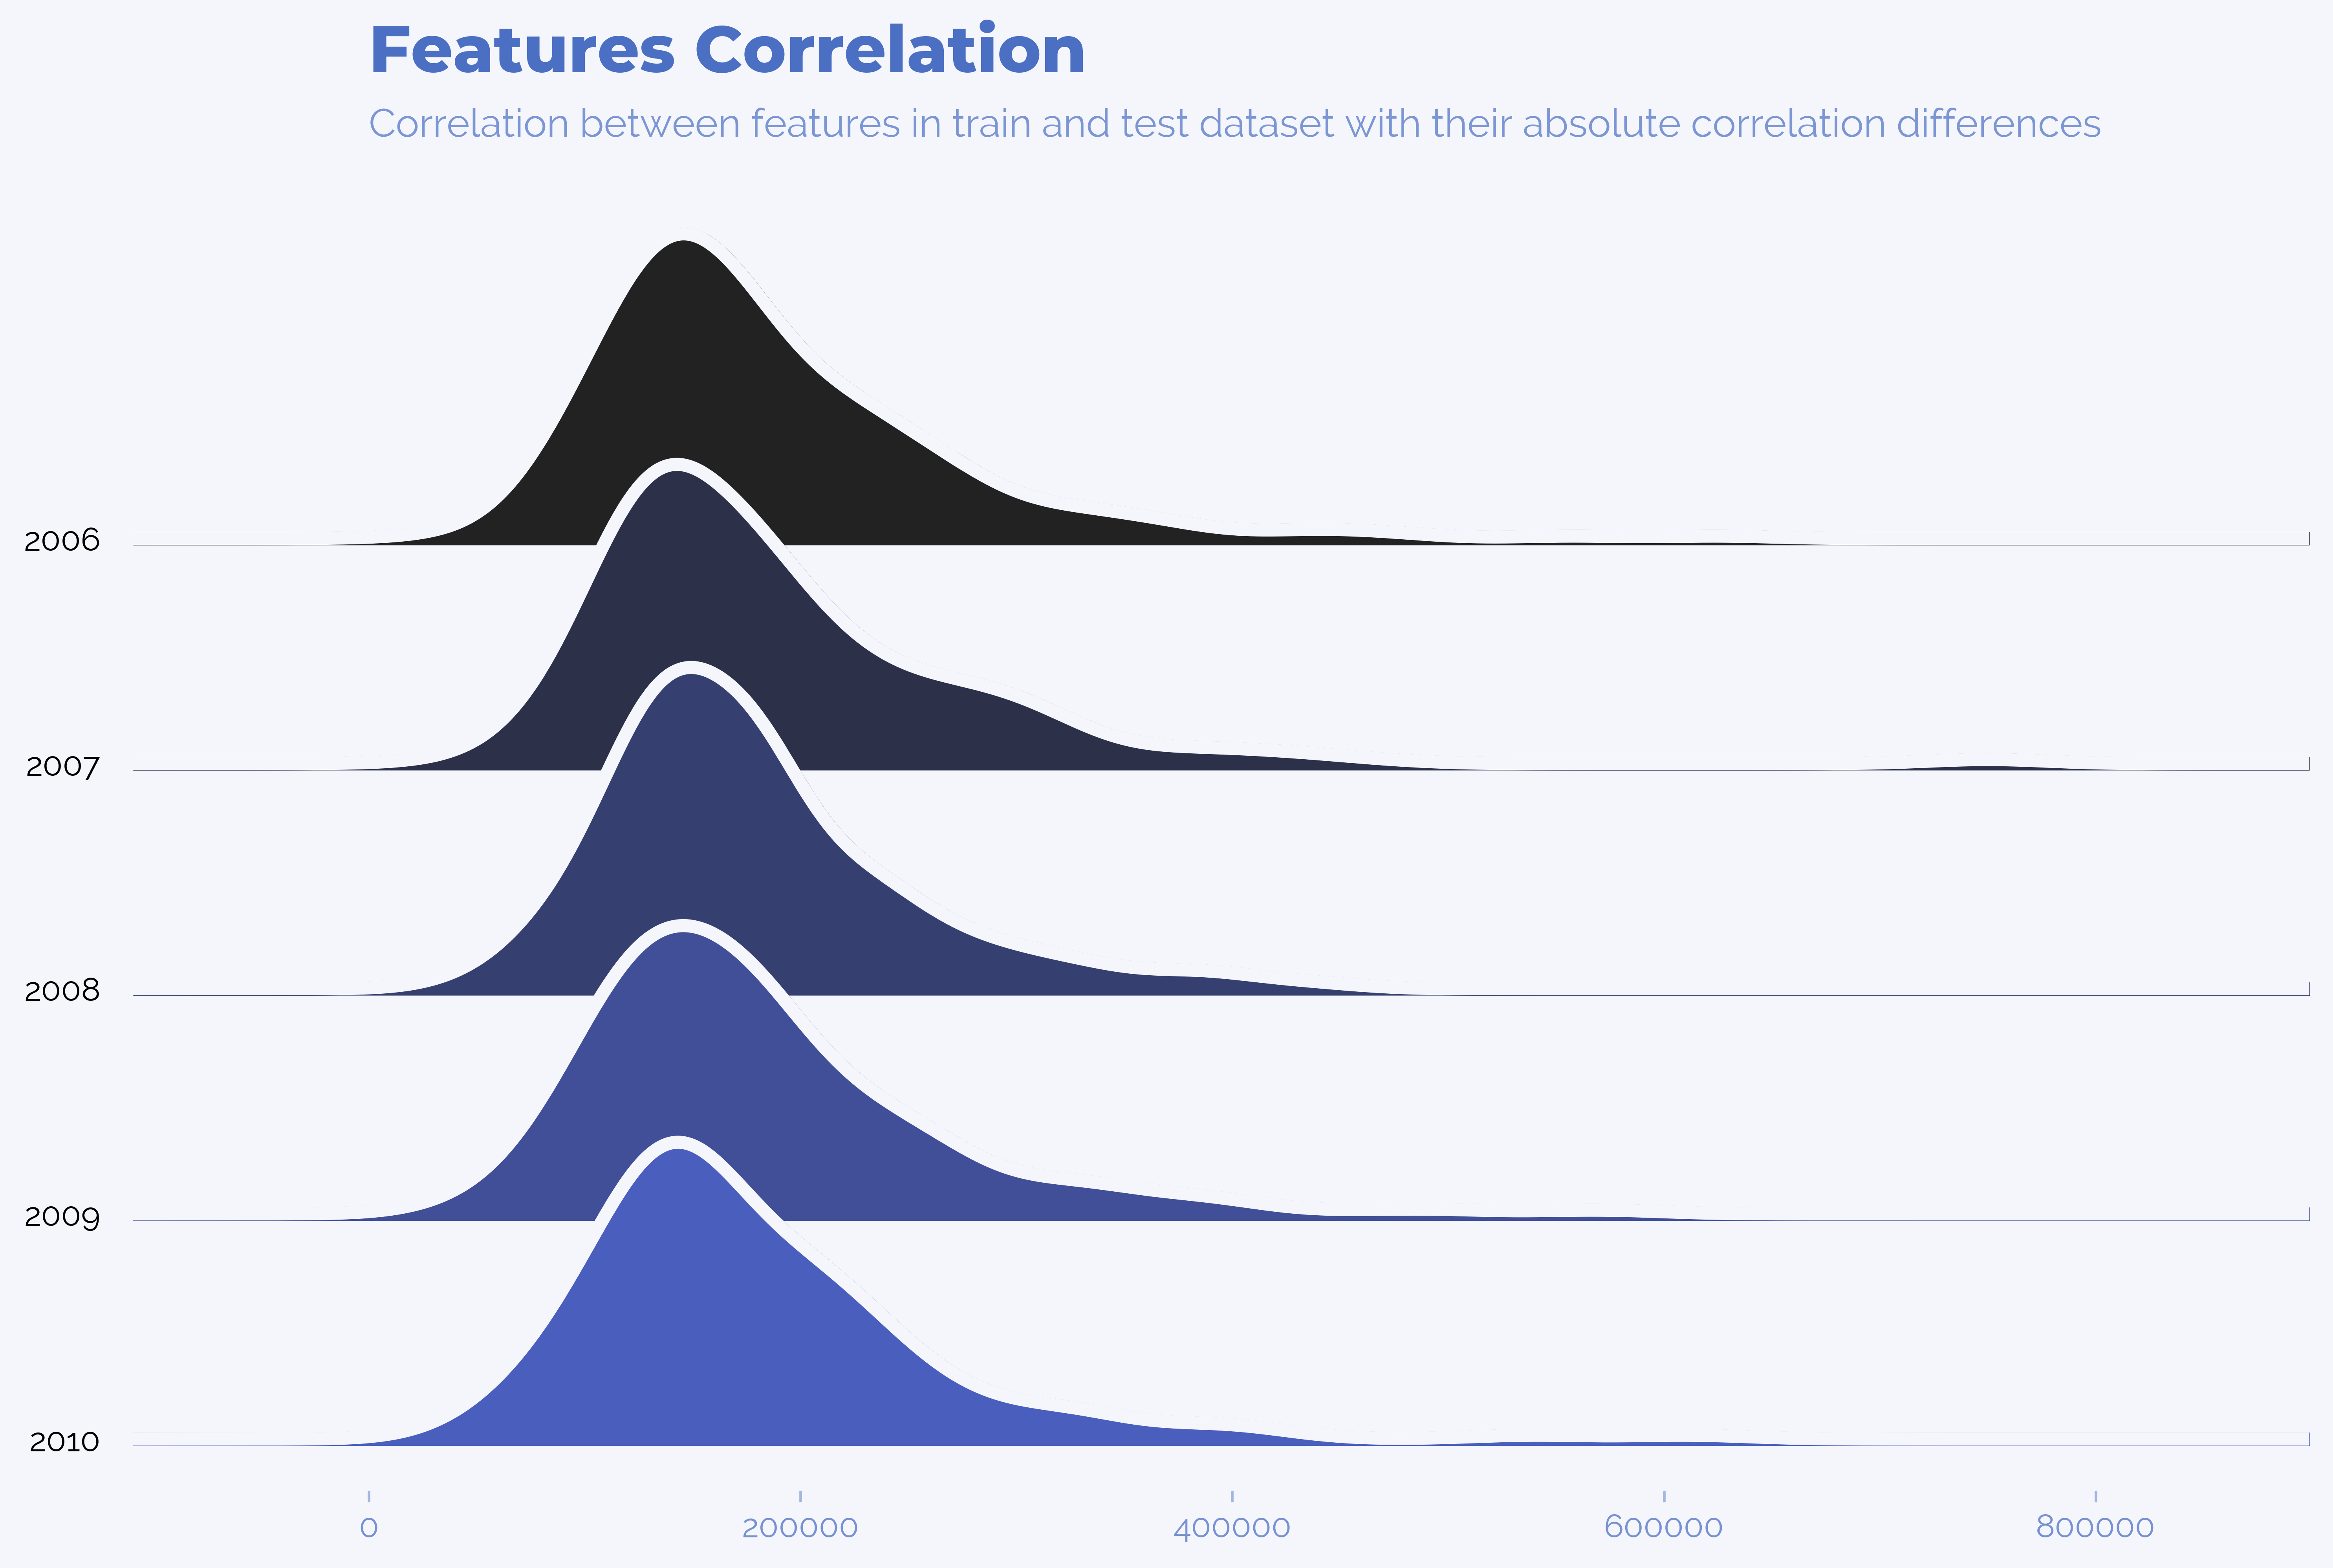

In [9]:
YrSold_uniq_val = train['YrSold'].unique()
plt.rcParams['font.family'] = 'Raleway'
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 6), facecolor= "#f4f6fc")
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)

ax0 = fig.add_subplot(gs[0, 1])
background_color = "#f4f6fc"
cmap_joyplt = sns.dark_palette("#546de5", as_cmap=True)
sns.set_palette(sns.color_palette(color_map))
ax0.set_facecolor(background_color)

joyplot(
    data=train[['SalePrice', 'YrSold']],
    by = 'YrSold',
    linecolor = background_color,
    overlap = 1,
    fade=False,
    ax = ax0,
    background = background_color,
    linewidth=4,
    colormap = cmap_joyplt,

)
plt.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')

plt.text(0, 1.1, 'Features Correlation', fontsize=20, fontweight='bold', color = '#4a6fc3',fontfamily='Montserrat')
plt.text(0, 1.05, 'Correlation between features in train and test dataset with their absolute correlation differences', fontsize=12, color = '#7c96d4')
plt.show();


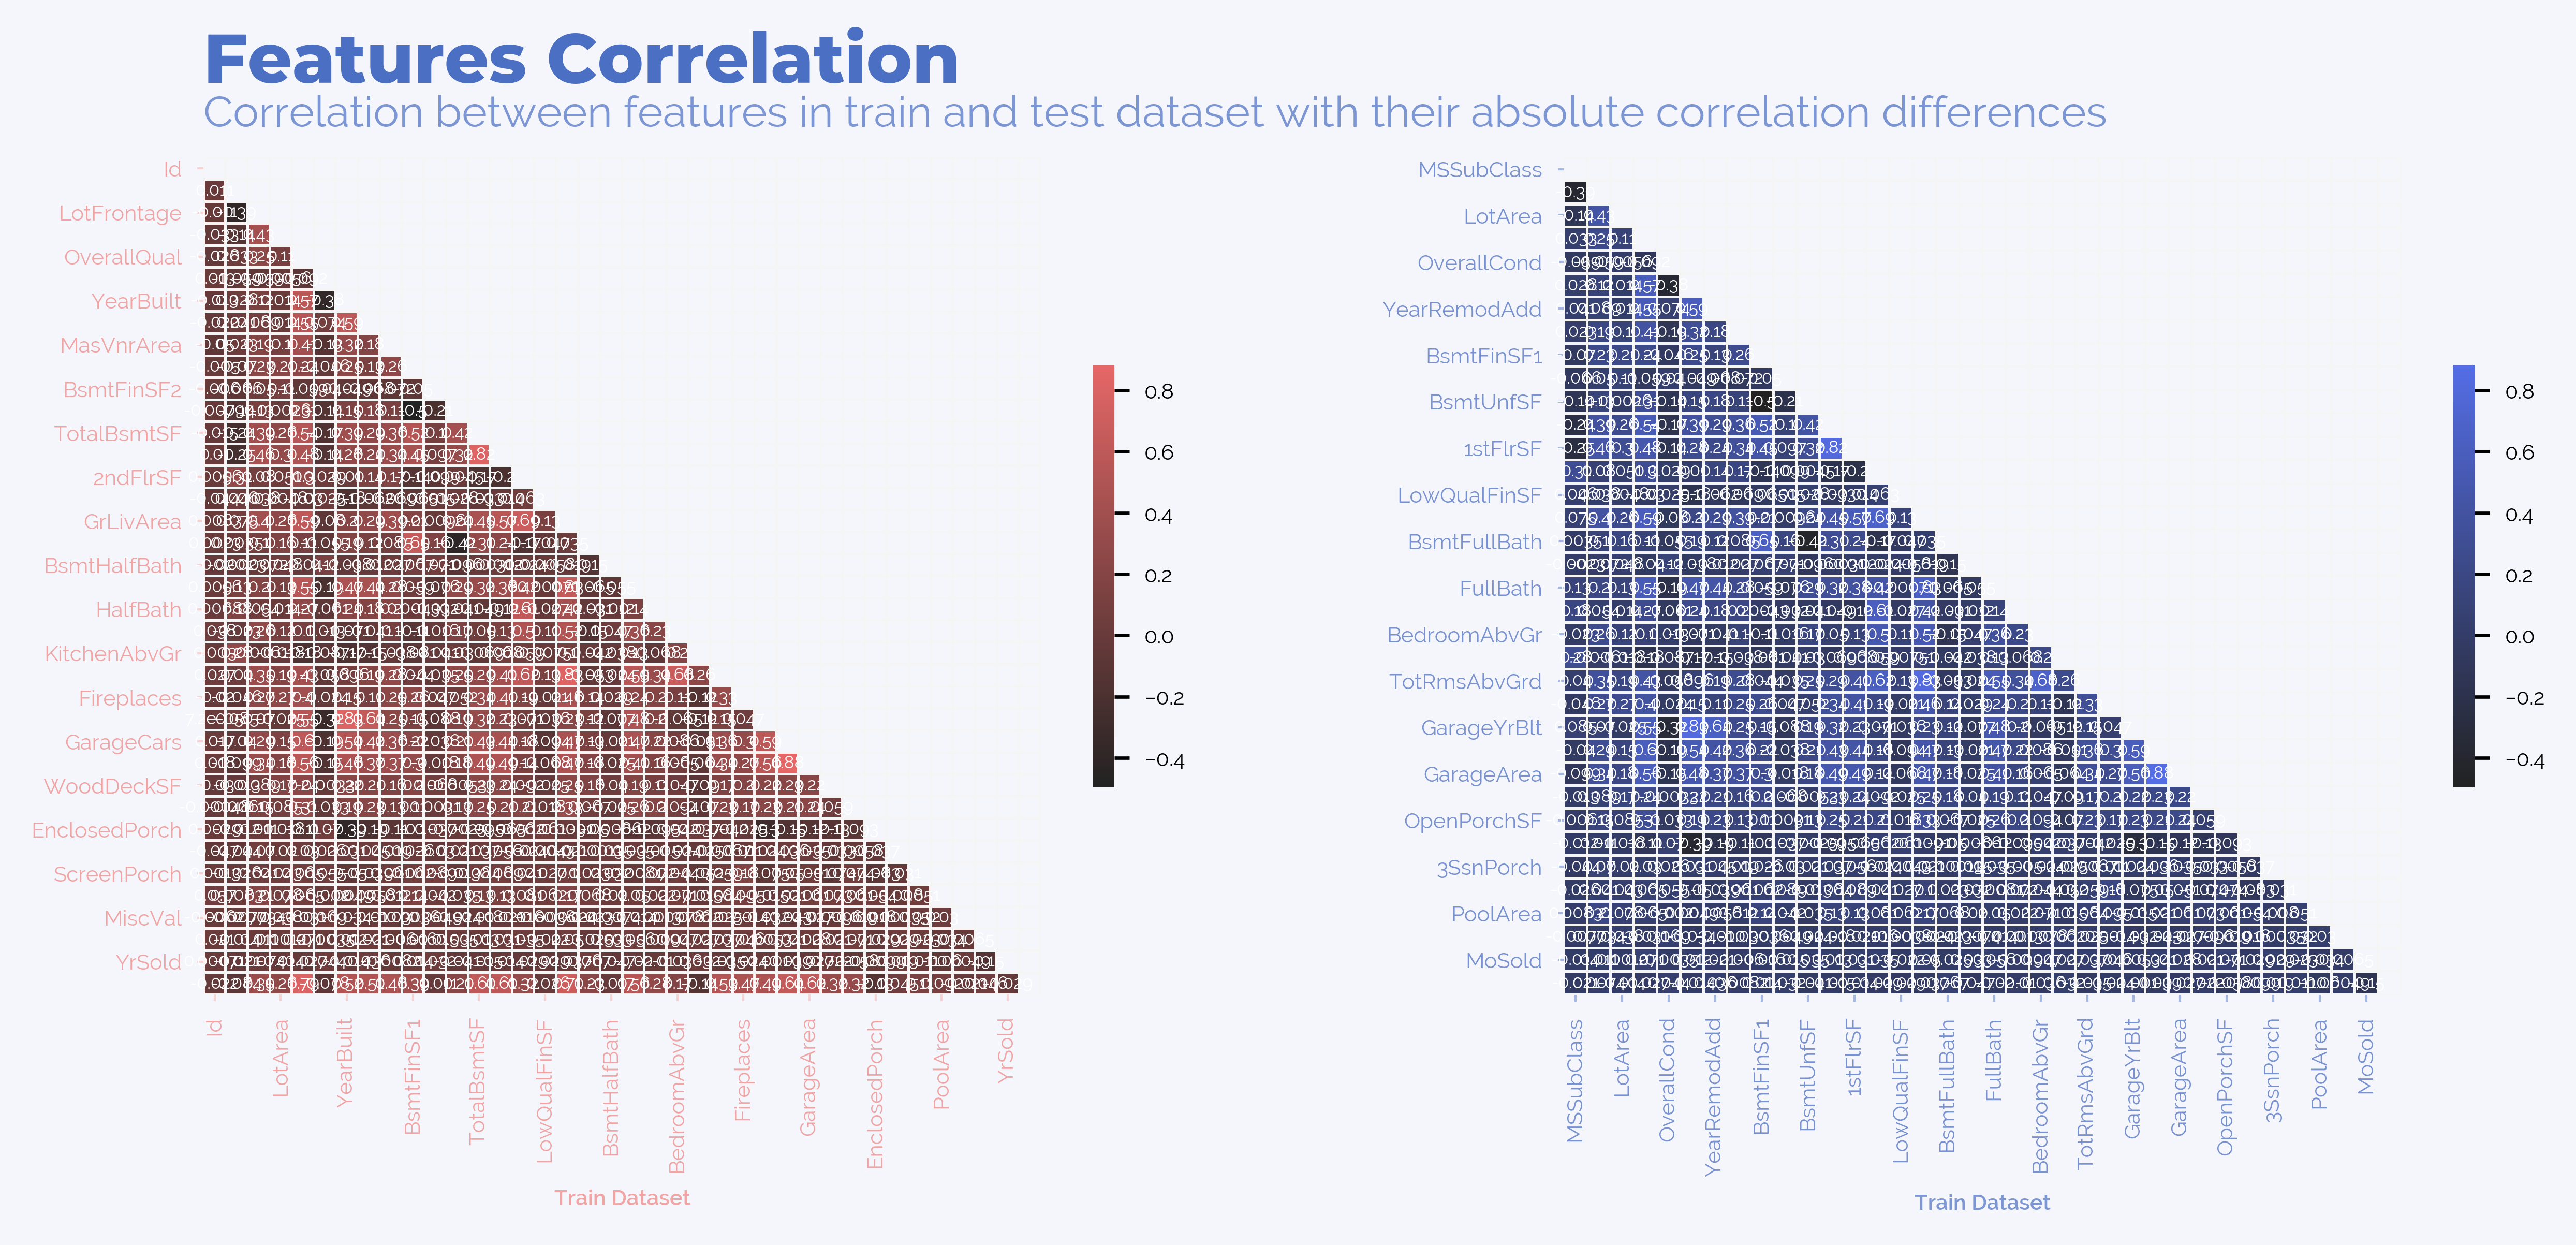

In [10]:
train_corr = train.corr()
train_quan_corr = train[quantitative].corr()
#train_qual_corr = train[qualitative].corr()
plt.rcParams['font.family'] = 'Raleway'
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 6), facecolor= "#f4f6fc")
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)

background_color = "#f4f6fc"
cmap_train = sns.dark_palette('#e66767', as_cmap=True)
cmap_quan = sns.dark_palette('#546de5', as_cmap=True)
#cmap_qual = sns.dark_palette('#ff69b4', as_cmap=True)

mask = np.triu(np.ones_like(train_corr, dtype=bool))
mask_quan = np.triu(np.ones_like(train_quan_corr, dtype=bool))

run_no = 0
for row in range(0, 1):
    for col in range(0, 2):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
sns.heatmap(train_corr, ax=ax0, cmap=cmap_train, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3}, annot=True, annot_kws={"fontsize":4})
ax0.set_xlabel(col, fontsize=5, fontweight='bold', color='#f0a4a4')
ax0.tick_params(labelsize=5, width=0.5, length=1.5,  color = '#f8d1d1', colors='#f0a4a4')
ax0.set_xlabel('Train Dataset', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

sns.heatmap(train_quan_corr, ax=ax1, cmap=cmap_quan, square=True, mask=mask_quan, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3}, annot=True, annot_kws={"fontsize":4})
ax1.set_xlabel(col, fontsize=5, fontweight='bold')
ax1.tick_params(labelsize=5, width=0.5, length=1.5,  color = '#a2b6e1', colors='#7791d1')
ax1.set_xlabel('Train Dataset', fontsize=5, fontweight='bold', color = '#7c96d4')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

ax0.text(0, -3.4, 'Features Correlation', fontsize=16, fontweight='bold', color = '#4a6fc3',fontfamily='Montserrat')
ax0.text(0, -1.4, 'Correlation between features in train and test dataset with their absolute correlation differences', fontsize=10, color = '#7c96d4')

plt.show()

In [11]:
train.corr()["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

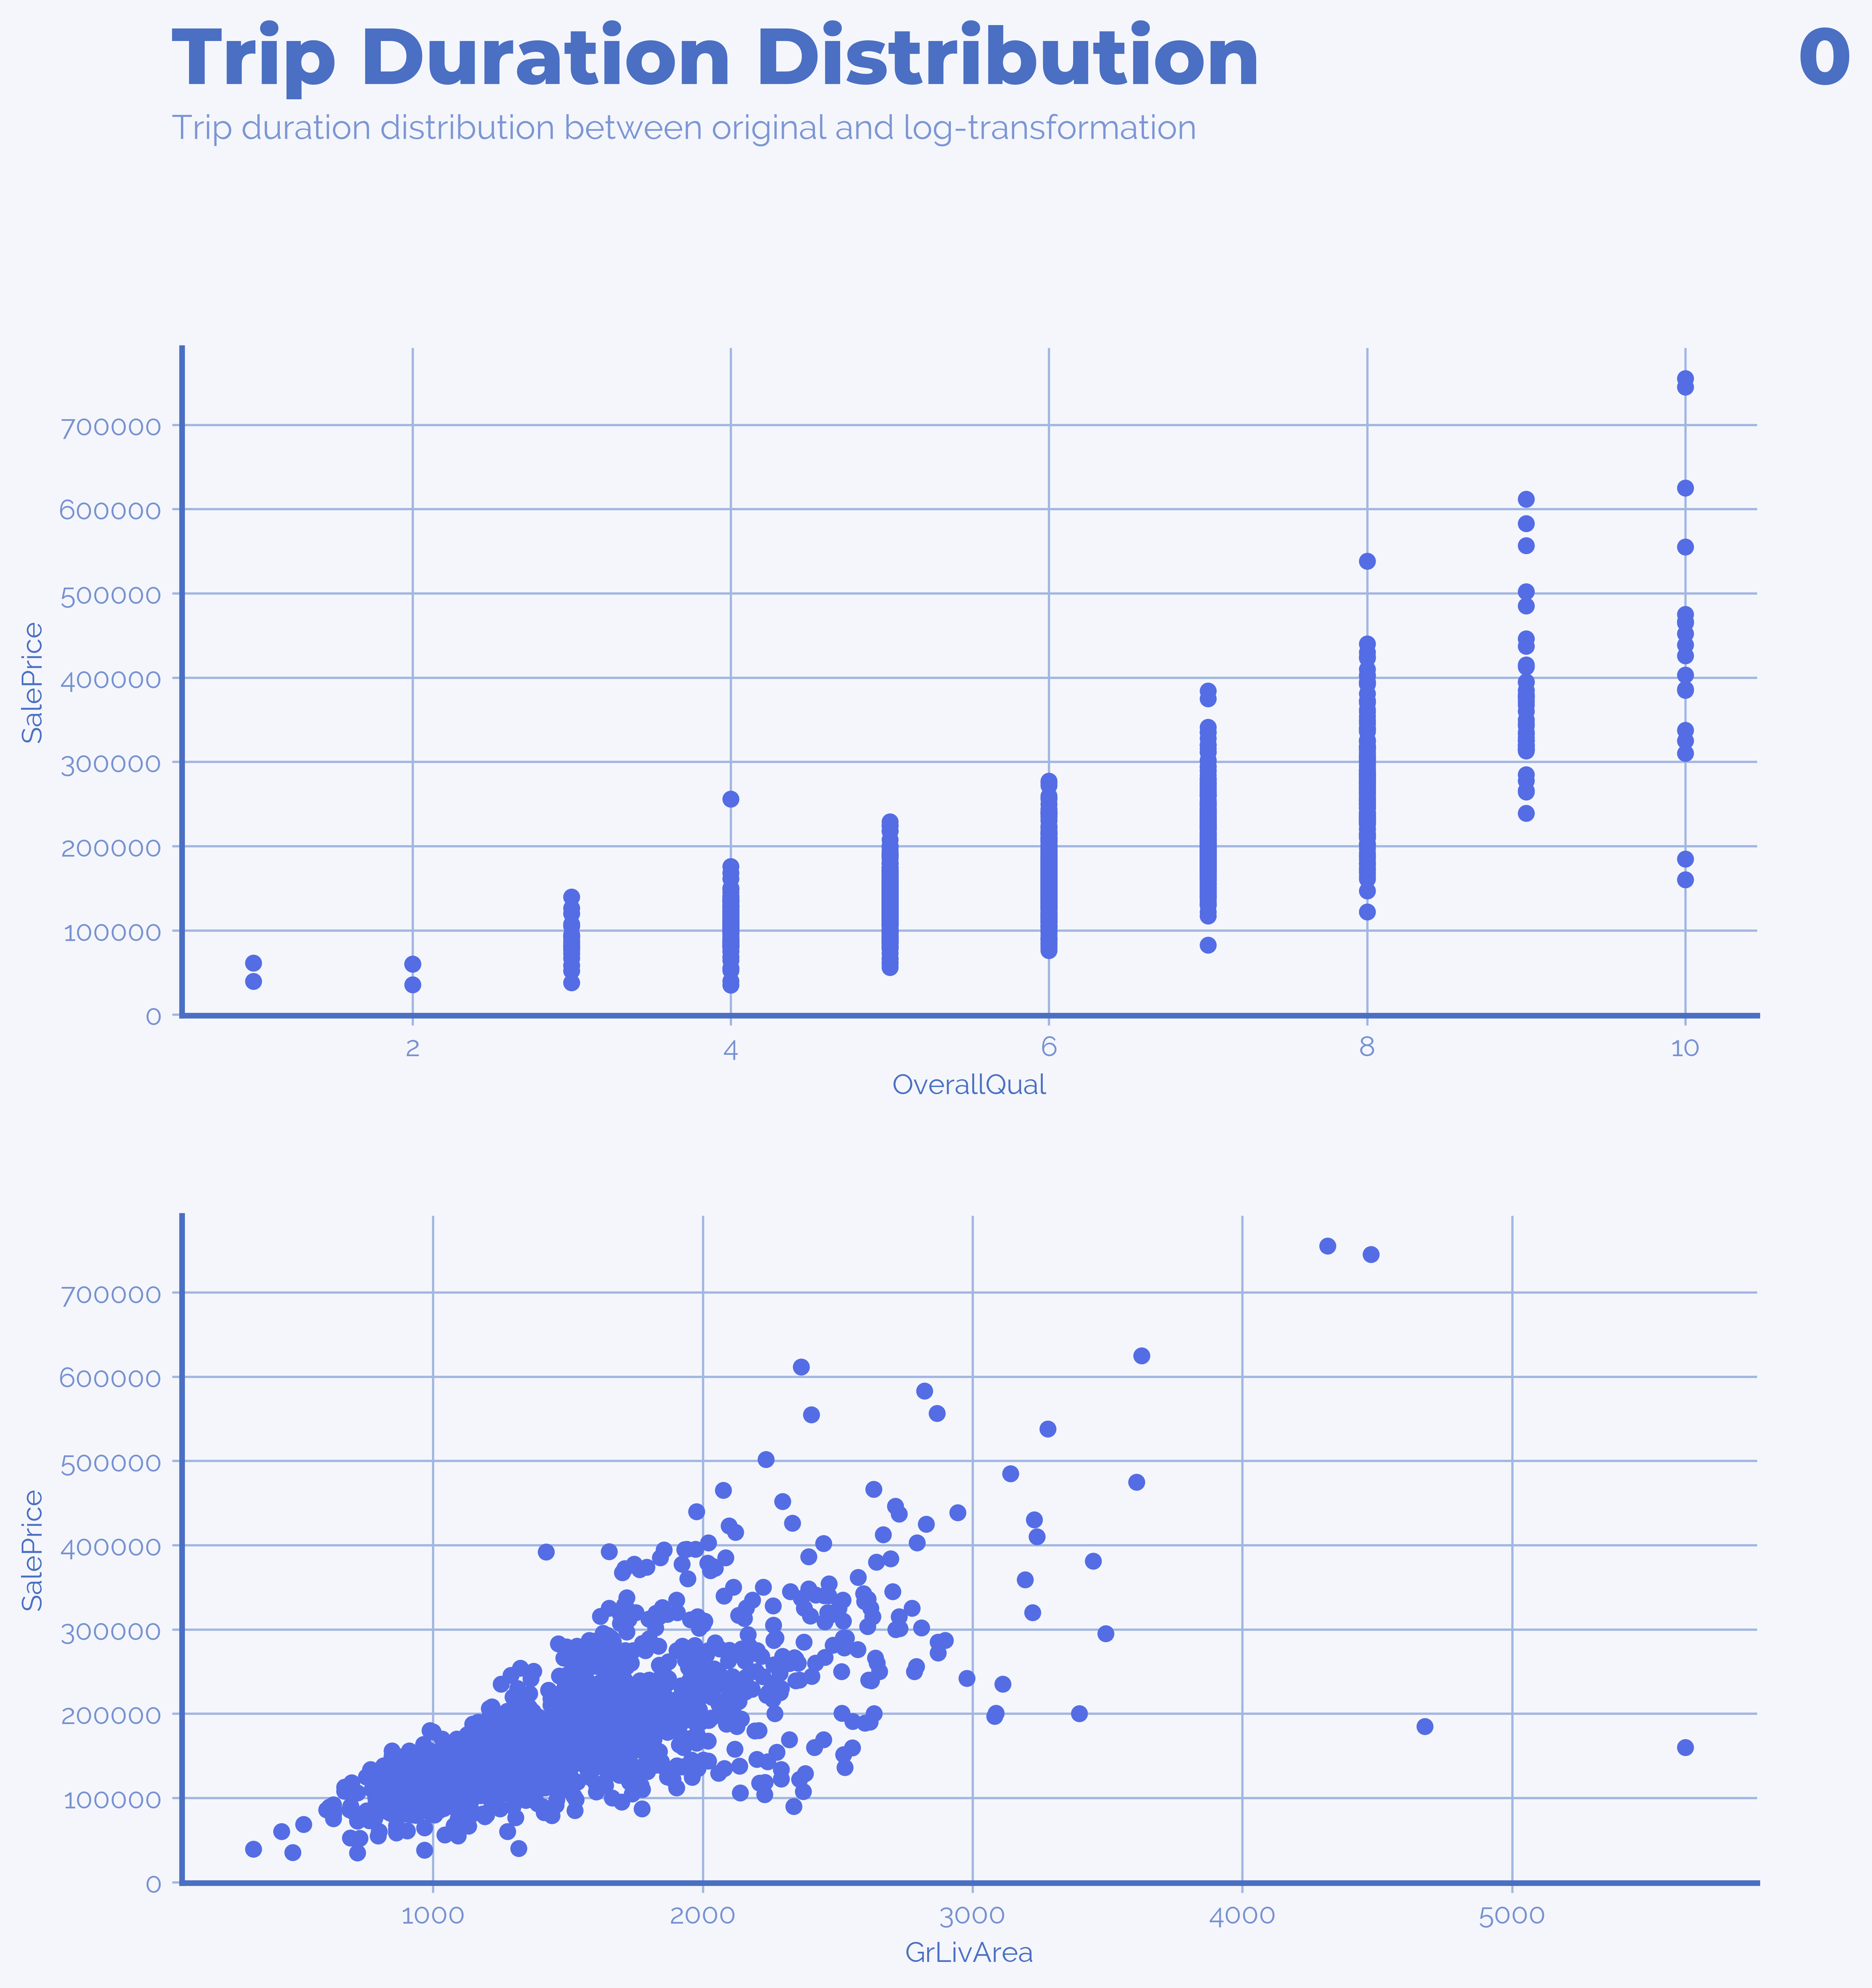

In [12]:
plt.rcParams['font.family'] = 'Raleway'
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor= "#f4f6fc")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f4f6fc"

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
sns.scatterplot(ax=ax0,data = train, x = "OverallQual", y = "SalePrice", zorder = 2, linewidth=0);
ax0.set_facecolor(background_color)
ax0.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax0.grid(which='major', axis='x', zorder=1, color='#a2b6e1')
ax0.grid(which='major', axis='y', zorder=1, color='#a2b6e1')
ax0.spines['bottom'].set_color('#4a6fc3')
ax0.spines['left'].set_color('#4a6fc3')
ax0.spines['left'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.xaxis.label.set_color('#4a6fc3')
ax0.yaxis.label.set_color('#4a6fc3')

ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
sns.scatterplot(ax=ax1 ,data = train, x = "GrLivArea", y = "SalePrice", zorder = 2, linewidth=0);
ax1.set_facecolor(background_color)
ax1.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax1.grid(which='major', axis='x', zorder=1, color='#a2b6e1')
ax1.grid(which='major', axis='y', zorder=1, color='#a2b6e1')
ax1.spines['bottom'].set_color('#4a6fc3')
ax1.spines['left'].set_color('#4a6fc3')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.xaxis.label.set_color('#4a6fc3')
ax1.yaxis.label.set_color('#4a6fc3')

fig.text(0.12, 1.01, 'Trip Duration Distribution', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.92, 1.01, '0', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.12, 0.983, 'Trip duration distribution between original and log-transformation', fontsize=12, color = '#7c96d4', fontfamily='Raleway');
plt.show()

# Missing data

In [13]:
def percent_missing_data(df):
    missing_count = df.isna().sum().sort_values(ascending = False)
    missing_percent = 100 * df.isna().sum().sort_values(ascending = False) / len(df)
    
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    
    missing_table = pd.concat([missing_count,missing_percent], axis = 1)
    missing_table.columns = ["missing_count", "missing_percent"]
    
    return missing_table

In [14]:
percent_missing_data(train)

missing_count  missing_percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageCond               81         5.547945
GarageType               81         5.547945
GarageYrBlt              81         5.547945
GarageFinish             81         5.547945
GarageQual               81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtFinType1             37         2.534247
BsmtCond                 37         2.534247
BsmtQual                 37         2.534247
MasVnrArea                8         0.547945
MasVnrType                8         0.547945
Electrical                1         0.068493

In [15]:
print(train[quantitative].shape, train[qualitative].shape)

(1460, 36) (1460, 43)


In [16]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])
train['Electrical'].isna().sum()

0

In [17]:
train['MasVnrArea']= train['MasVnrArea'].fillna(0)
test['MasVnrArea']= test['MasVnrArea'].fillna(0)
train['MasVnrType']= train['MasVnrType'].fillna('None')
test['MasVnrType']= test['MasVnrType'].fillna('None')
train[['MasVnrArea','MasVnrType']].isna().sum()

MasVnrArea    0
MasVnrType    0
dtype: int64

In [18]:
bsmt_qual_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train[bsmt_qual_cols] = train[bsmt_qual_cols].fillna('None')
test[bsmt_qual_cols] = test[bsmt_qual_cols].fillna('None')
train[bsmt_qual_cols].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [19]:
train['GarageType']= train['GarageType'].fillna('Attchd')    
train['GarageCond']= train['GarageCond'].fillna('TA') 
train['GarageFinish']= train['GarageFinish'].fillna('Unf') 
train['GarageQual']= train['GarageQual'].fillna('TA') 

test['GarageType']= test['GarageType'].fillna('Attchd')    
test['GarageCond']= test['GarageCond'].fillna('TA') 
test['GarageFinish']= test['GarageFinish'].fillna('Unf') 
test['GarageQual']= test['GarageQual'].fillna('TA') 

train['GarageYrBlt']= train['GarageYrBlt'].fillna(train.GarageYrBlt.mean()) 
test['GarageYrBlt']= test['GarageYrBlt'].fillna(train.GarageYrBlt.mean()) 
train[[
'GarageType',
'GarageCond',
'GarageFinish',
'GarageQual',
'GarageYrBlt'
]].isna().sum()

GarageType      0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageYrBlt     0
dtype: int64

In [20]:
train = train.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1)
test = test.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1)

In [21]:
train['FireplaceQu']= train['FireplaceQu'].fillna('None')    
train['LotFrontage']= train['LotFrontage'].fillna(train.LotFrontage.median())  

test['FireplaceQu']= test['FireplaceQu'].fillna('None')    
test['LotFrontage']= test['LotFrontage'].fillna(train.LotFrontage.median())  

In [22]:
percent_missing_data(train)

Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []

In [23]:
quantitative = train._get_numeric_data().columns.to_list()
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
'''
for feature in qualitative:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)
'''

"\nfor feature in qualitative:\n    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index\n    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}\n    train[feature]=train[feature].map(labels_ordered)\n"

In [24]:


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[qualitative] = train[qualitative].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

test[qualitative] = test[qualitative].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [25]:
print(train[quantitative].shape, train[qualitative].shape)

(1460, 36) (1460, 39)


In [26]:
features = qualitative + quantitative

# Feature Scaling

## Разбиение 

In [27]:
train.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           2   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           2   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         4   
1         0.0          3          4           1         2         4   
2       162.0          2          4           2         2         4   
3         0.0          3          4           0         4         1   
4       350.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             6           0   
1             1             0         978             6           0   
2             2             2         486             6           0   
3             3             0         216             6           0   
4             0             2         655             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           4   
1        284         1262        1          0           1           4   
2        434          920        1          0           1           4   
3        540          756        1          2           1           4   
4        490         1145        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1    

In [28]:
X = train[features]
y = np.log(train['SalePrice'])
train_id = train['Id']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 75) (365, 75) (1095,) (365,)


In [32]:
X_train.head(5)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
1023         3       1         3            3          0          4   
810          3       1         3            3          0          4   
1384         3       1         3            3          0          4   
626          3       1         0            3          0          4   
813          3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
1023          0             0           2           2         4           2   
810           0            14           2           2         0           2   
1384          0             7           2           2         0           0   
626           0            12           2           2         0           2   
813           0            12           2           2         0           2   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
1023          1         1           12           13           1          2   
810           3         1            6            6           1          3   
1384          1         1           14           15           2          3   
626           3         1           13           14           2          3   
813           1         1            8            8           1          3   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
1023          4           2         2         1             3             2   
810           4           1         4         4             3             0   
1384          4           0         4         4             2             5   
626           4           1         4         4             3             6   
813           4           1         4         4             3             5   

      BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
1023             6        1          0           1           4            2   
810              3        1          1           1           4            2   
1384             6        1          4           1           4            3   
626              6        1          4           1           4            3   
813              6        1          2           1           4            3   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
1023           6            2           1             0           4   
810            6            1           1             1           4   
1384           6            3           5             2           4   
626            2            5           1             1           4   
813            6            3           1             1           4   

      GarageCond  PavedDrive  SaleType  SaleCondition  MSSubClass  \
1023           4           2         8              4         120   
810            4           2         8              4          20   
1384           4           1         8              4          50   
626            4           2         8              4          20   
813            4           2         0              4          20   

      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1023         43.0     3182            7            5       2005          2006   
810          78.0    10140            6            6       1974          1999   
1384         60.0     9060            6            5       1939          1950   
626          69.0    12342            5            5       1960          1978   
813          75.0     9750            6            6       1958          1958   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1023        14.0          16           0       1330         1346      1504   
810         99.0         663         377          0         1040      1309   
1384         0.0         204           0        356          560       698   
626          0.0           0           0    

## Приведение к Z значению 

In [33]:
# Standard scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

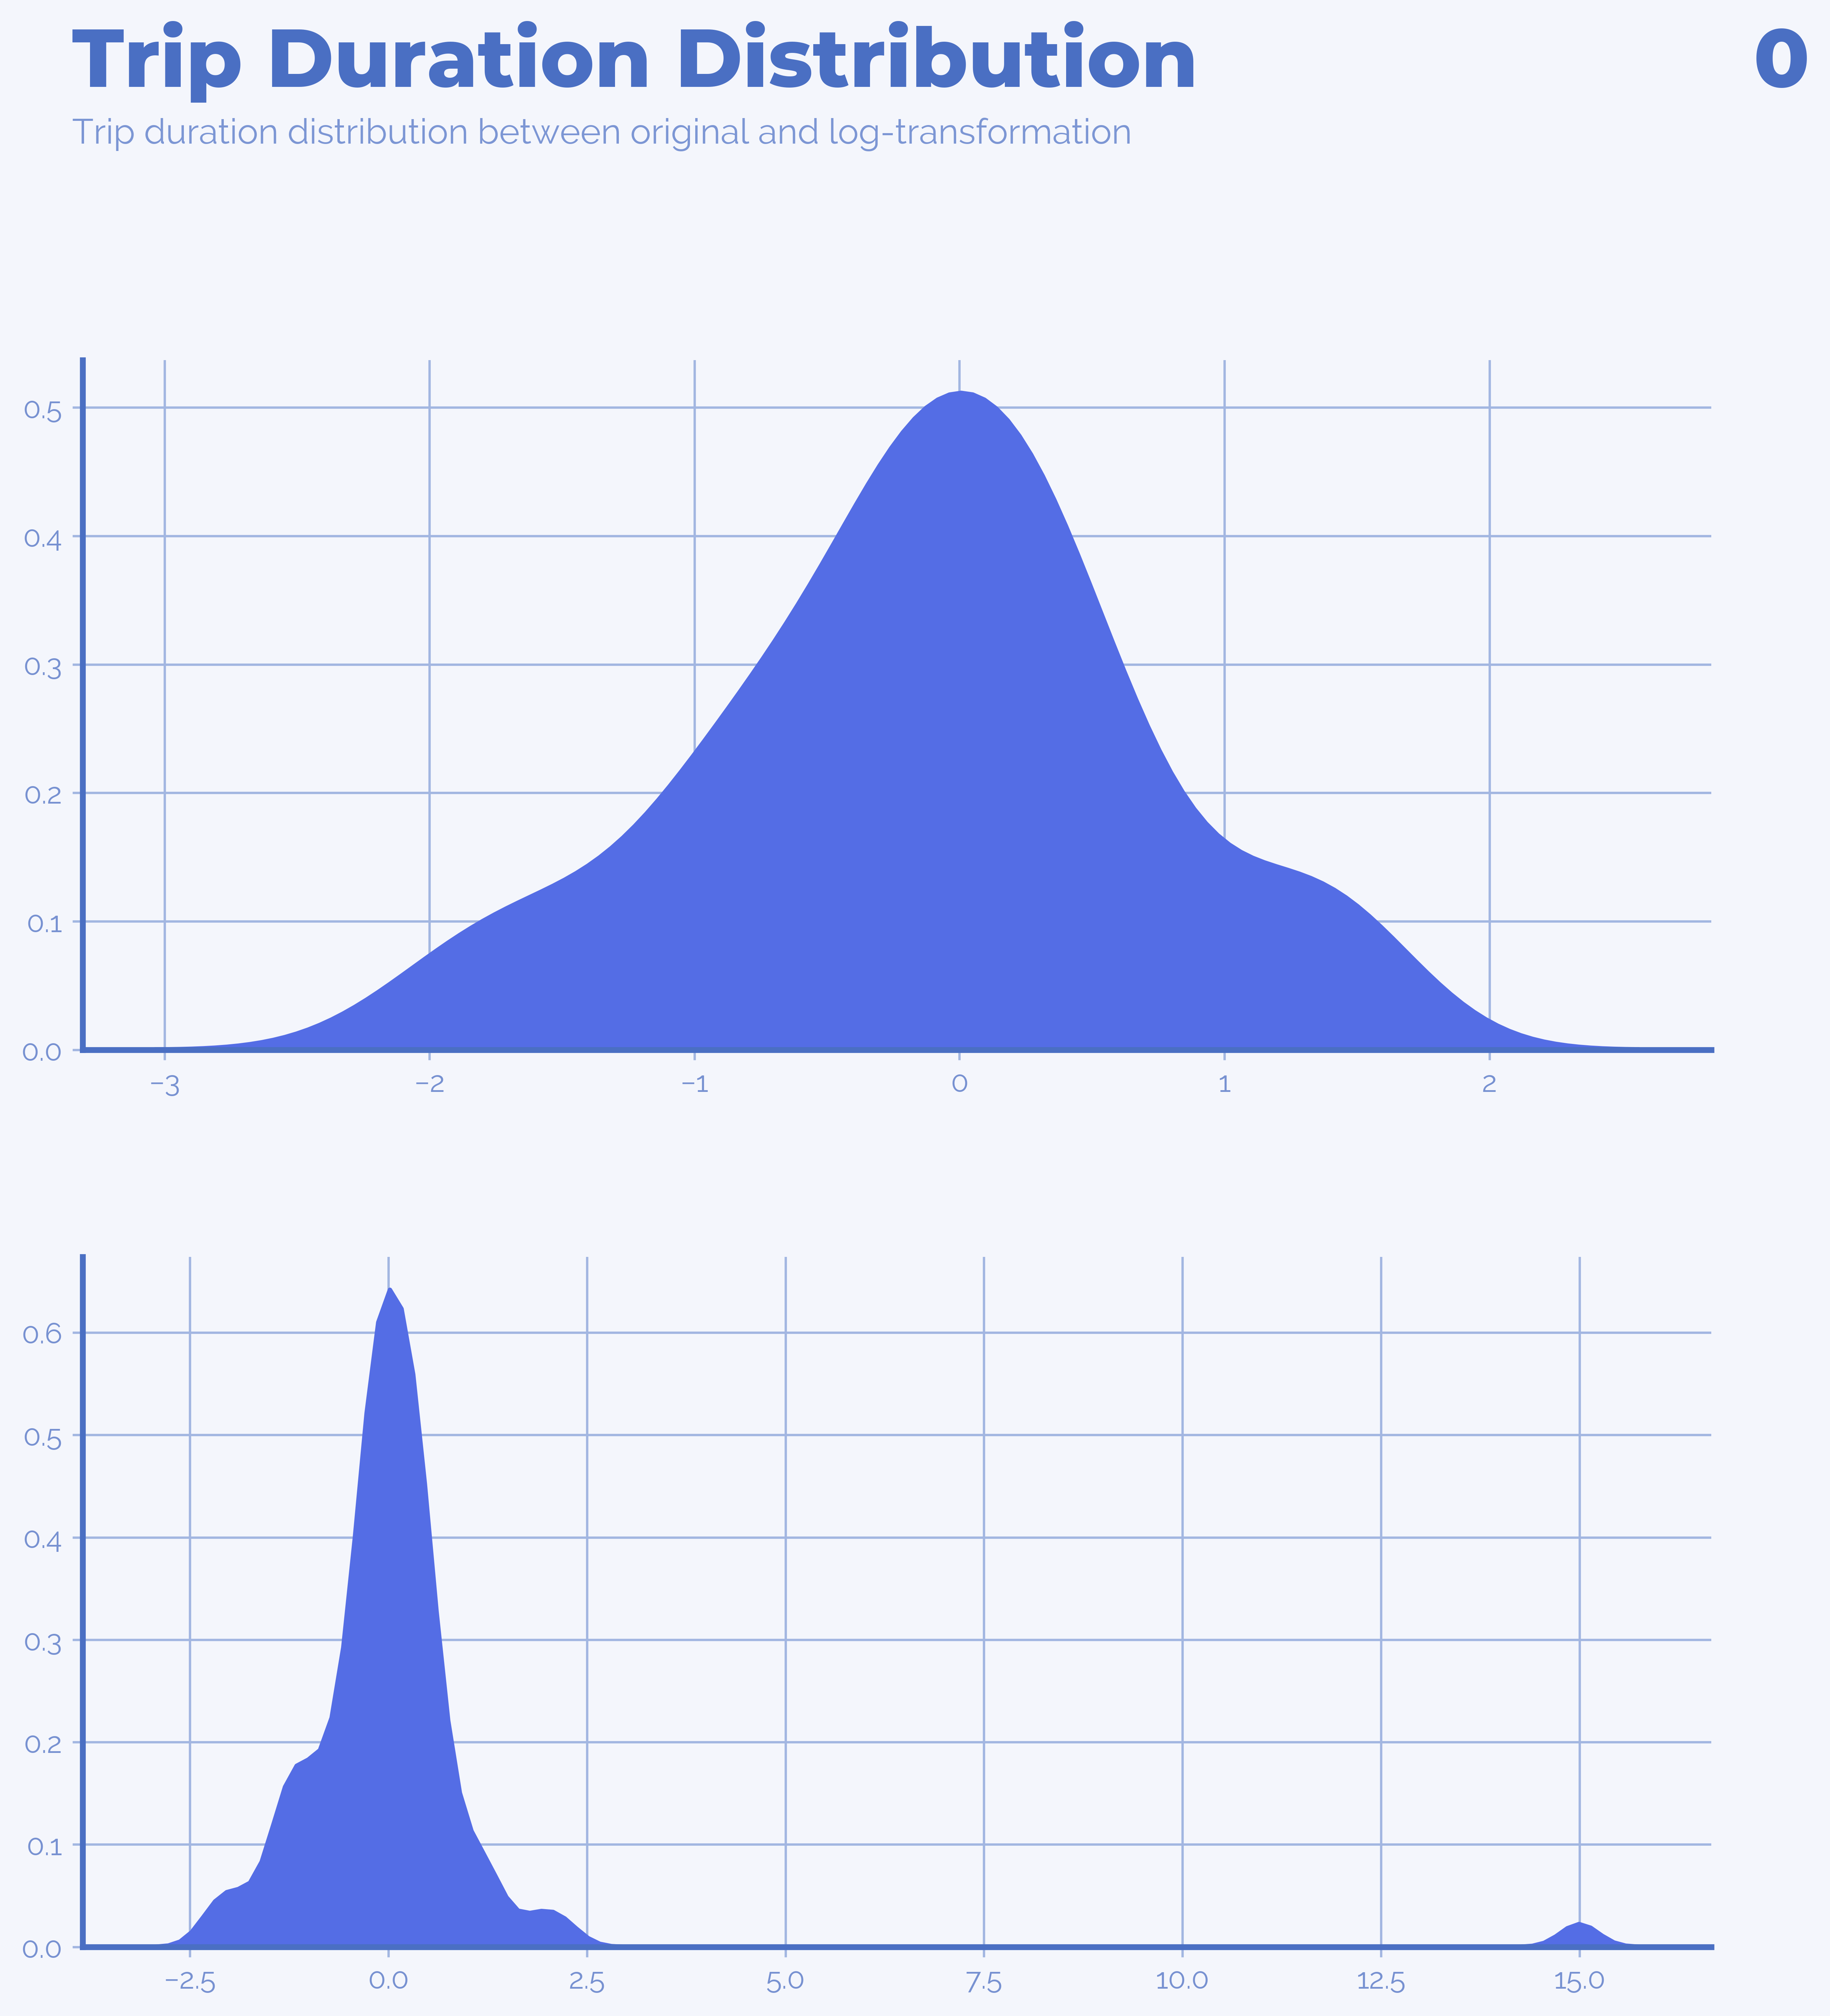

In [34]:
plt.rcParams['font.family'] = 'Raleway'
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor= "#f4f6fc")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f4f6fc"


ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
sns.kdeplot(ax = ax0, data = X_train[25], zorder=2, alpha=1, shade=True)
ax0.set_facecolor(background_color)
ax0.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax0.grid(which='major', axis='x', zorder=1, color='#a2b6e1')
ax0.grid(which='major', axis='y', zorder=1, color='#a2b6e1')
ax0.spines['bottom'].set_color('#4a6fc3')
ax0.spines['left'].set_color('#4a6fc3')
ax0.spines['left'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.xaxis.label.set_color('#4a6fc3')
ax0.yaxis.label.set_color('#4a6fc3')


ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
#sns.kdeplot(data = train['street'], zorder=2, alpha=1, shade=True)
sns.kdeplot(ax = ax1, data = X_train[1], zorder=2, alpha=1, shade=True)
ax1.set_facecolor(background_color)
ax1.tick_params(labelsize=10, color = '#a2b6e1', colors='#7791d1')
ax1.grid(which='major', axis='x', zorder=1, color='#a2b6e1')
ax1.grid(which='major', axis='y', zorder=1, color='#a2b6e1')
ax1.spines['bottom'].set_color('#4a6fc3')
ax1.spines['left'].set_color('#4a6fc3')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.xaxis.label.set_color('#4a6fc3')
ax1.yaxis.label.set_color('#4a6fc3')

fig.text(0.12, 1.01, 'Trip Duration Distribution', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.92, 1.01, '0', fontsize=28, fontweight='bold', color = '#4a6fc3', fontfamily='Montserrat');
fig.text(0.12, 0.983, 'Trip duration distribution between original and log-transformation', fontsize=12, color = '#7c96d4', fontfamily='Raleway');
plt.show()

# Finding anomaly

In [35]:
from sklearn.ensemble import IsolationForest
model =  IsolationForest(contamination = 'auto')
model.fit(X)
X['anomaly25'] = pd.Series(model.predict(X))
X['anomaly25'] = X['anomaly25'].map( {1: 0, -1: 1} )
print(X['anomaly25'].value_counts())


0    1402
1      58
Name: anomaly25, dtype: int64


<ipython-input-35-c4557cfec1c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly25'] = pd.Series(model.predict(X))
<ipython-input-35-c4557cfec1c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly25'] = X['anomaly25'].map( {1: 0, -1: 1} )


In [36]:
outliers_idx = X[X['anomaly25'] == 1]['anomaly25'].index
#X.drop(X.iloc[outliers_idx], inplace=True, axis=1)
#X[not in X.iloc[outliers_idx]]
X = X.query("index not in @outliers_idx")
#X.head(5)
y = y.drop(index = outliers_idx)
print(X.shape, y.shape)

(1402, 76) (1402,)


In [37]:
del X['anomaly25']

# Model Building 

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_r2_score = r2_score(y_test, y_pred)
print(f"Mae :{lin_mae}")
print(f"R2 :{lin_r2_score}")

Mae :0.10548731383710061
R2 :0.8701443891559931


In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge = Ridge(alpha = 199)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_r2_score = r2_score(y_test, y_pred)

print(f"Mae :{mean_absolute_error(y_test, y_pred)}")
print(f"R2 :{r2_score(y_test, y_pred)}")

Mae :0.10092855830210817
R2 :0.8787919639594769


In [42]:
#alpha_mse

In [43]:
alpha_list = []
mse_list = []
for alpha_val in np.arange(0.01, 200):
    ridge1 = Ridge(alpha = alpha_val)
    ridge1.fit(X_train, y_train)
    alpha_list.append(alpha_val)
    
    # testing the model
    y_predict = ridge1.predict(X_test)
    mse = mean_absolute_error(y_test, y_predict)
    mse_list.append(mse)
    
alpha_list = pd.DataFrame(alpha_list)
mse_list = pd.DataFrame(mse_list)
alpha_mse = pd.concat([alpha_list, mse_list], axis = 1)
alpha_mse.columns = ["alpha_list", "mse_list"]

alpha_mse[alpha_mse["mse_list"] == alpha_mse["mse_list"].min()]

alpha_list  mse_list
199      199.01  0.100928

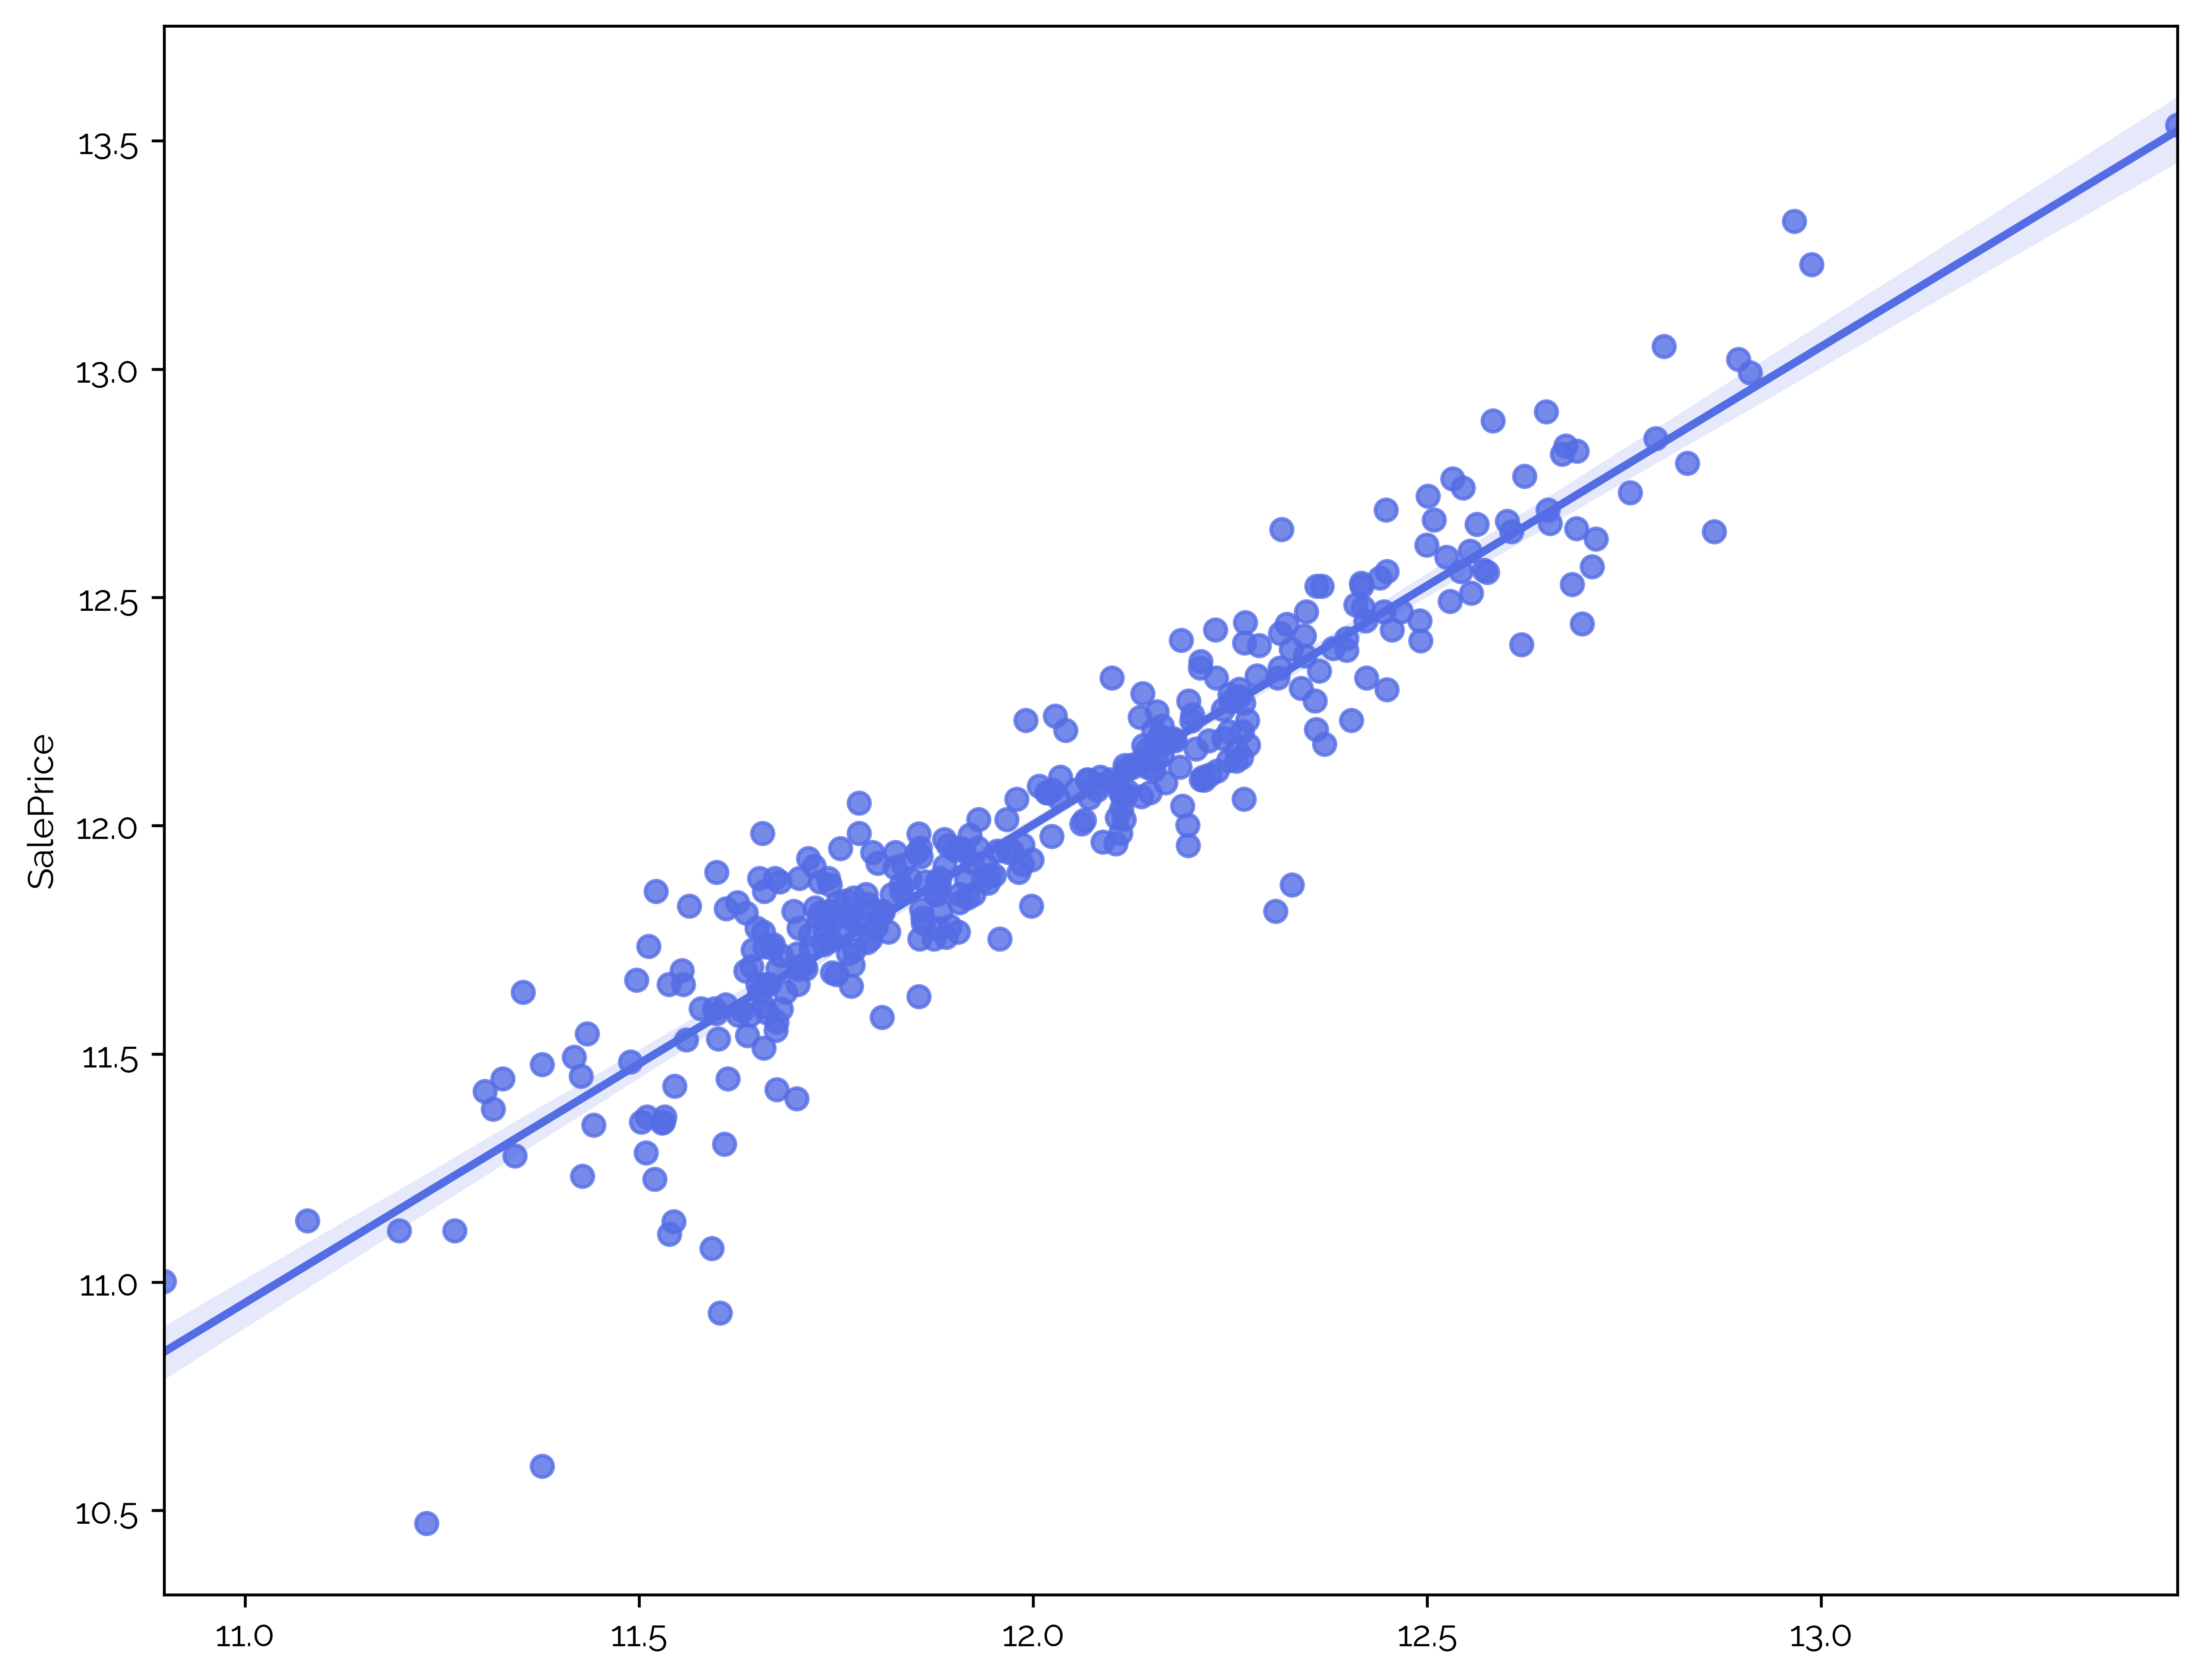

In [44]:
plt.figure(figsize=(10,8))
sns.regplot(y_pred,y_test);

In [45]:
from sklearn.linear_model import Lasso

In [46]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train, y_train)

Y_pred = ls.predict(X_test)

# testing the model
from sklearn.metrics import mean_absolute_error
print("MAE : ",mean_absolute_error(y_test, Y_pred))

from sklearn.model_selection import cross_val_score
print('R2 SCORE : ',r2_score(y_test, Y_pred))

MAE :  0.32386110078709013
R2 SCORE :  -0.004525048487928451


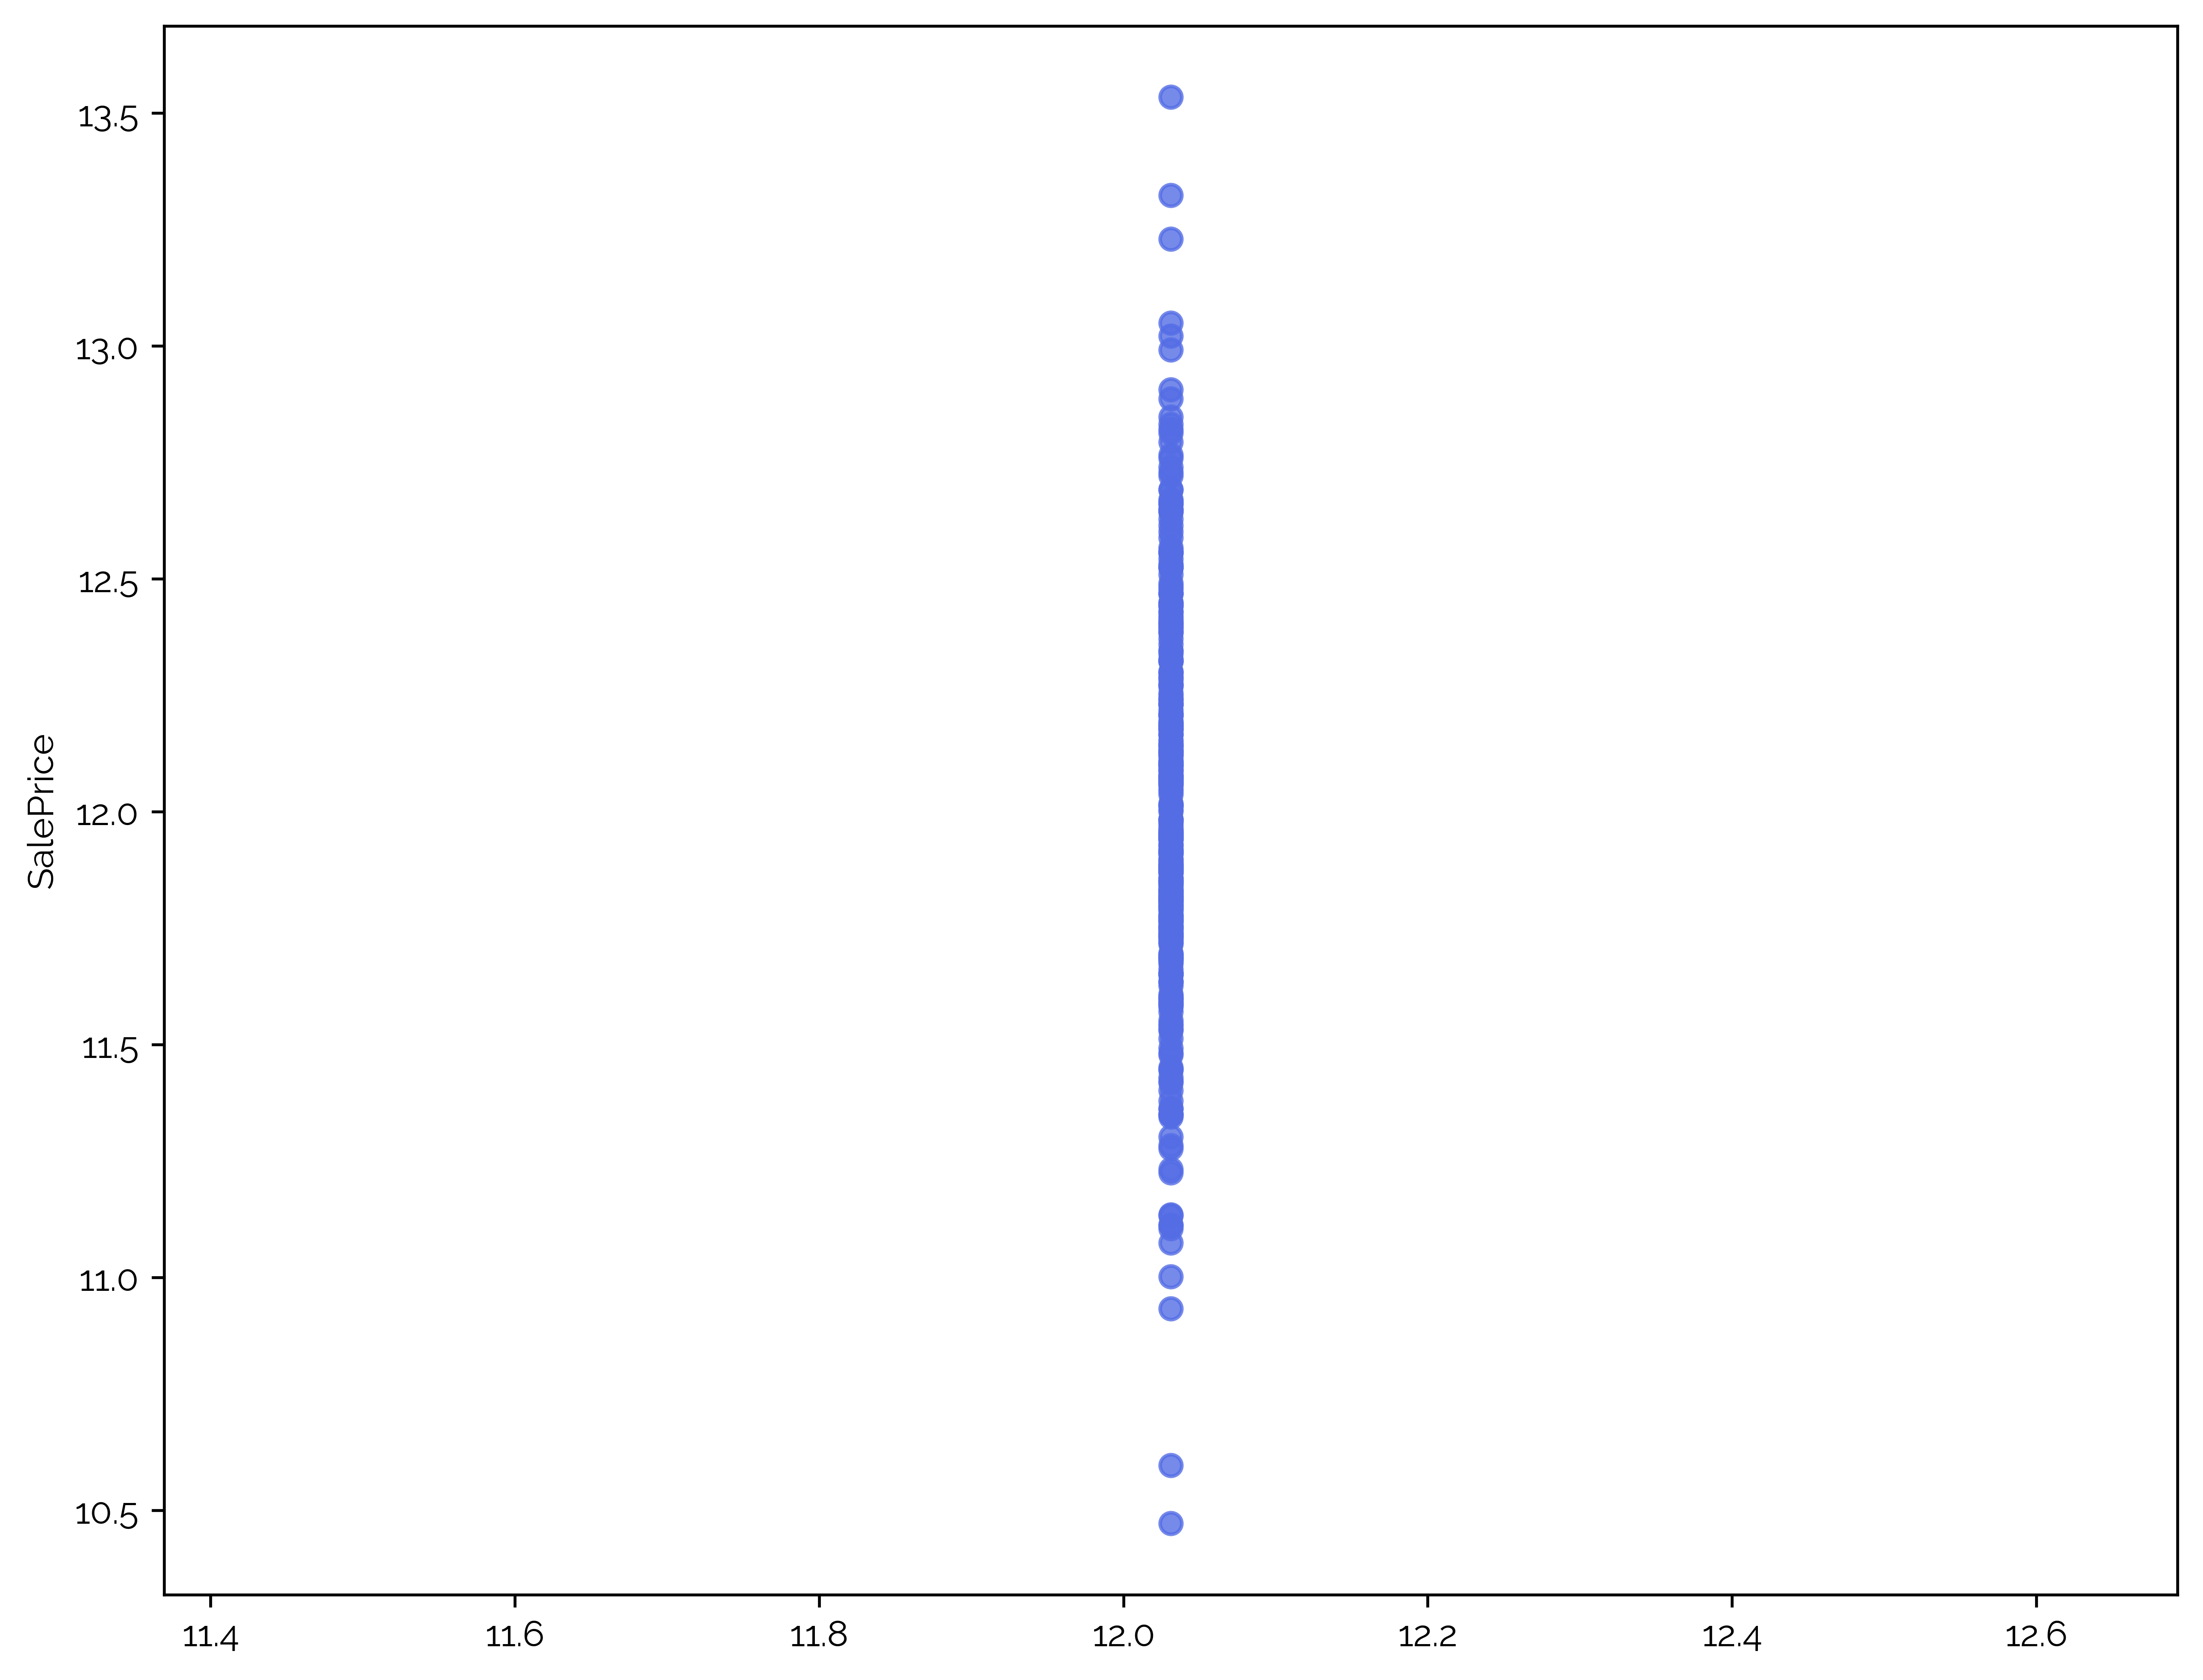

In [47]:
plt.figure(figsize=(10,8))
sns.regplot(x=Y_pred,y=y_test);

In [48]:
Y_pred[:5]

array([12.03104891, 12.03104891, 12.03104891, 12.03104891, 12.03104891])

In [49]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

Y_pred_lasso = ls.predict(X_test)

# testing the model
lasso_mae = mean_absolute_error(y_test, Y_pred_lasso)
lasso_r2_score= r2_score(y_test, Y_pred_lasso)

print("MAE for Lasso : ",lasso_mae)
print('R2 SCORE for Lasso : ',lasso_r2_score)

MAE for Lasso :  0.1033566610806652
R2 SCORE for Lasso :  0.8768716942640076


In [50]:
Y_pred_lasso.min()

11.010205497512457

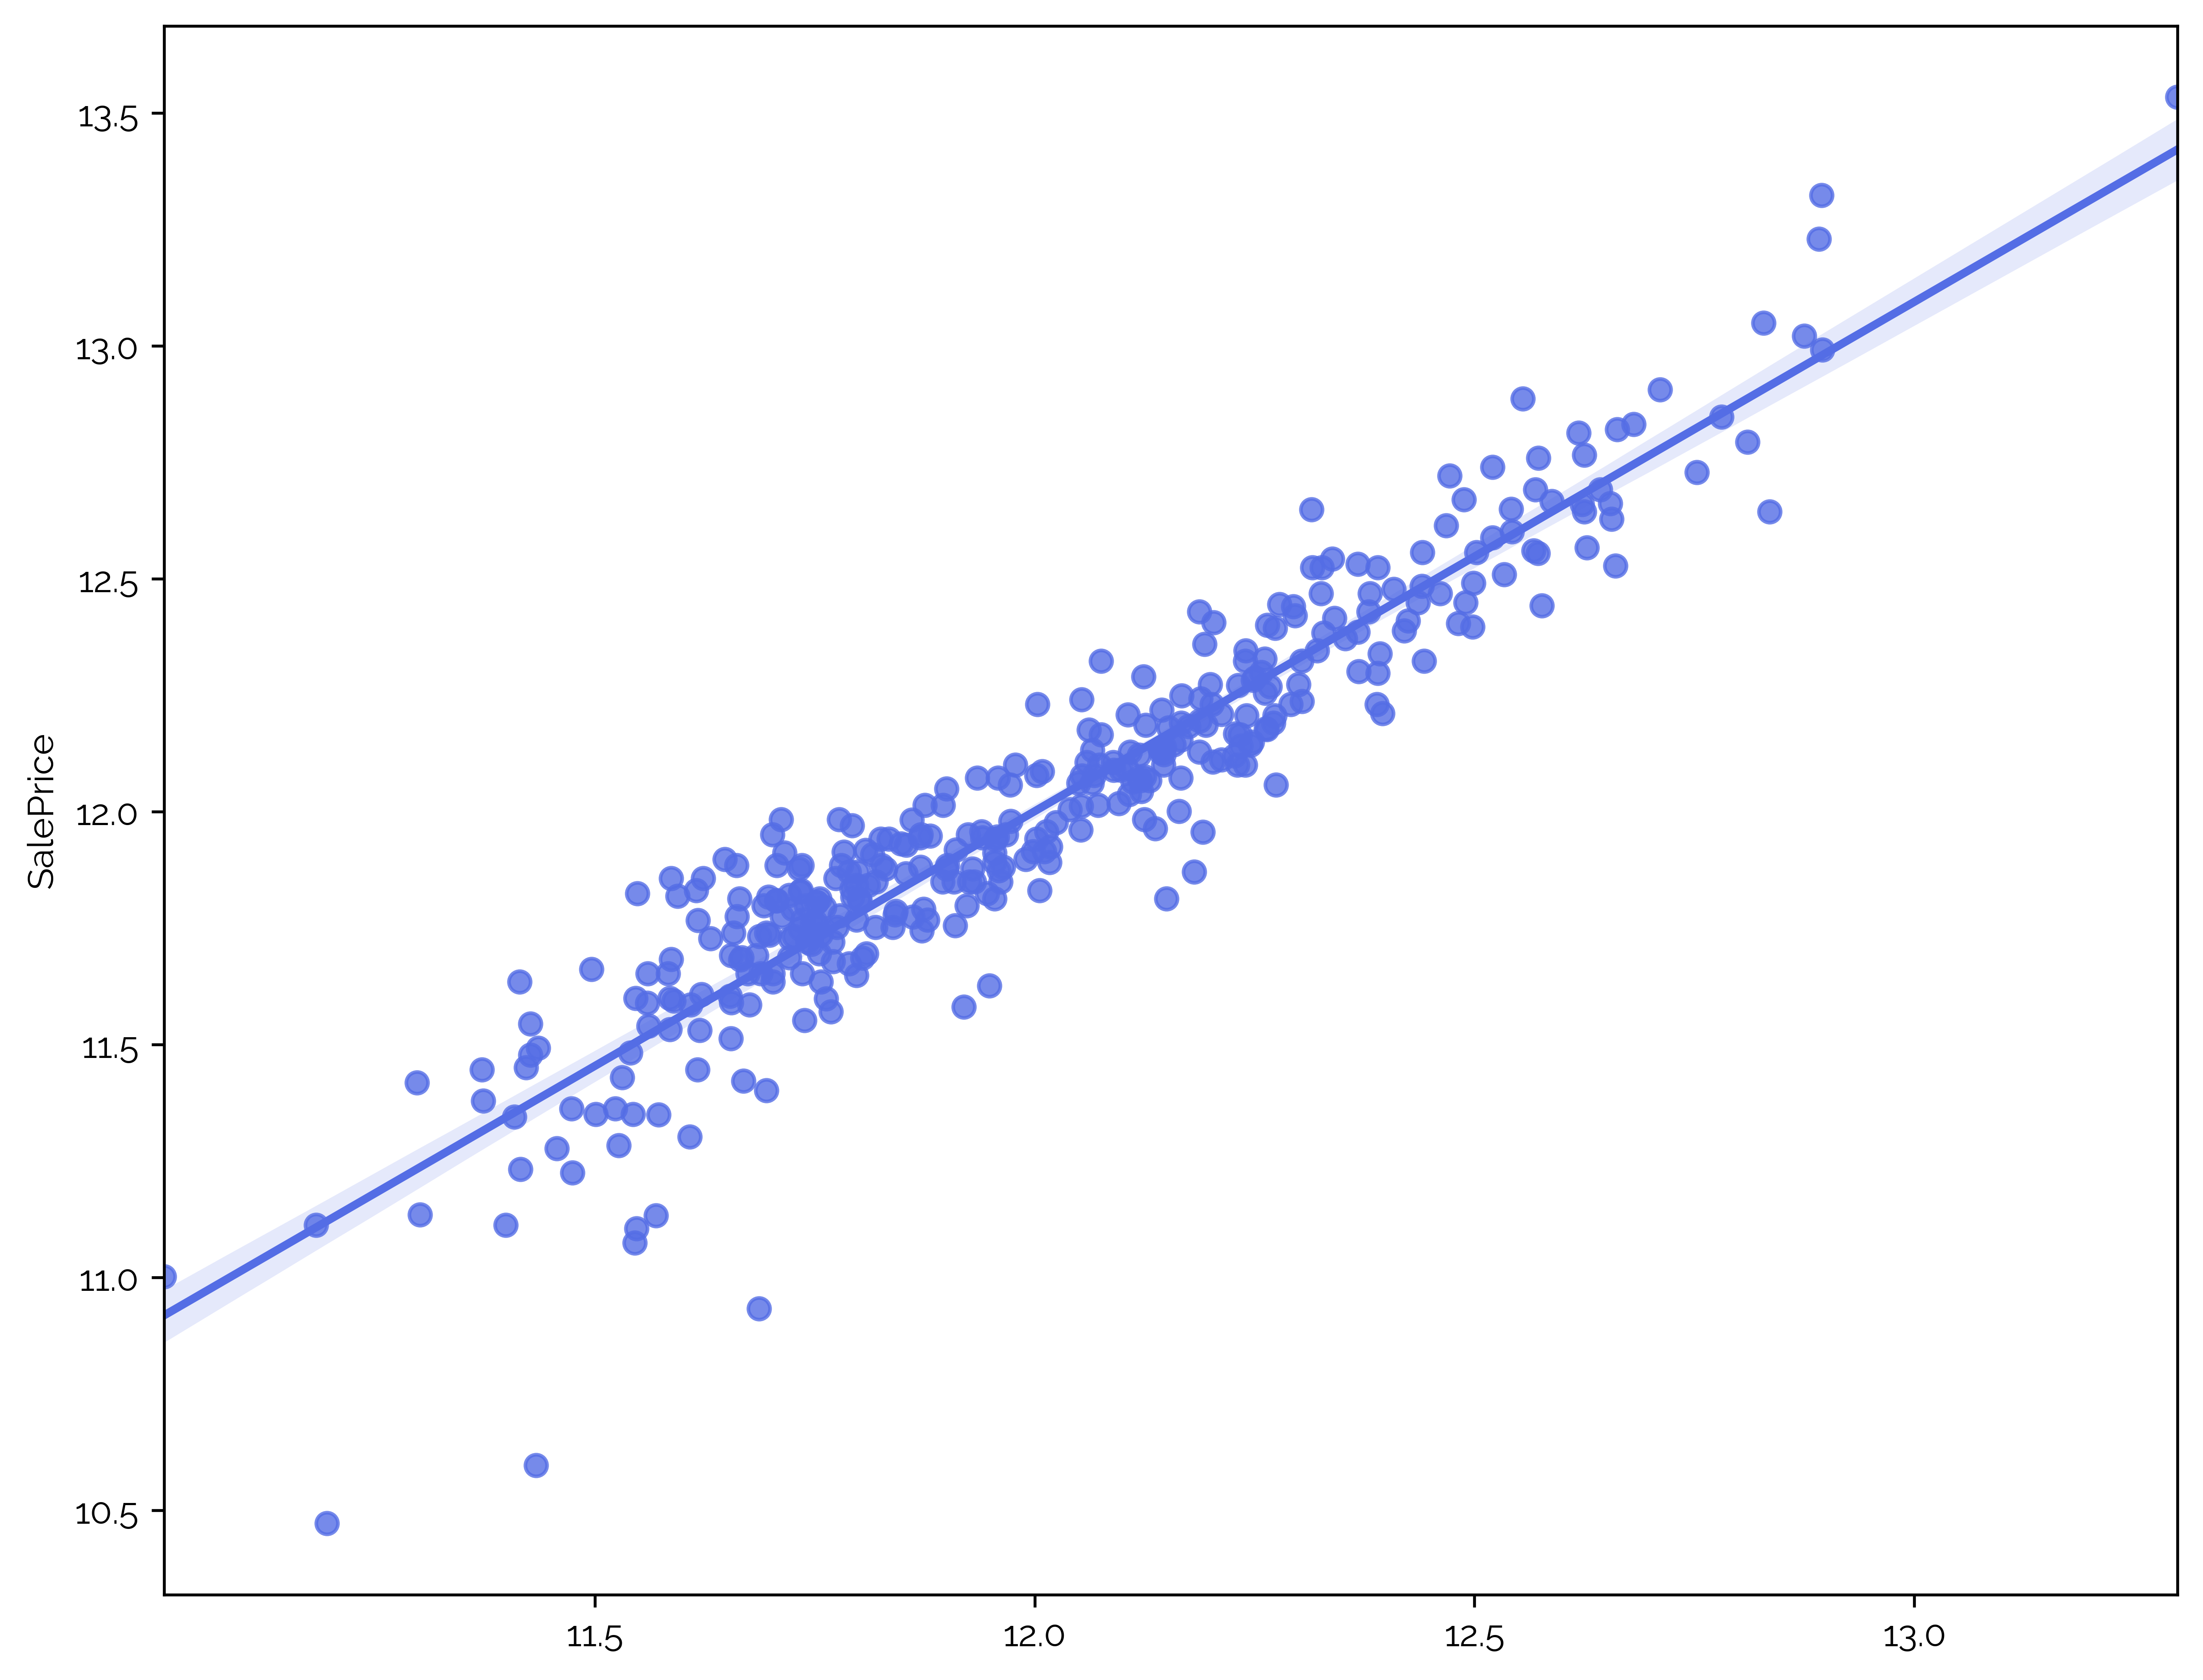

In [51]:
plt.figure(figsize=(10,8))
sns.regplot(x = Y_pred_lasso, y = y_test)

# Polynomial

In [52]:
#Import the poly conerter 
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

#convert X data 
poly_features_train = polynomial_converter.fit_transform(X_train)
poly_features_test = polynomial_converter.fit_transform(X_test)

In [53]:
#import elastic net 
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio= 1,tol=0.01)
elastic_model.fit(poly_features_train,y_train)

ElasticNetCV(l1_ratio=1, tol=0.01)

In [54]:
Y_pred_poly = elastic_model.predict(poly_features_test)

In [55]:
#testing model
poly_mae = mean_absolute_error(y_test, Y_pred_poly)
poly_r2_score = r2_score(y_test, Y_pred_poly)
print("MAE for Polynomial: ",poly_mae)
print('R2 SCORE for Polynomial: ',poly_r2_score)

MAE for Polynomial:  0.09424290403962009
R2 SCORE for Polynomial:  0.8892766202323785


In [56]:
Y_pred.min()

12.031048912964195

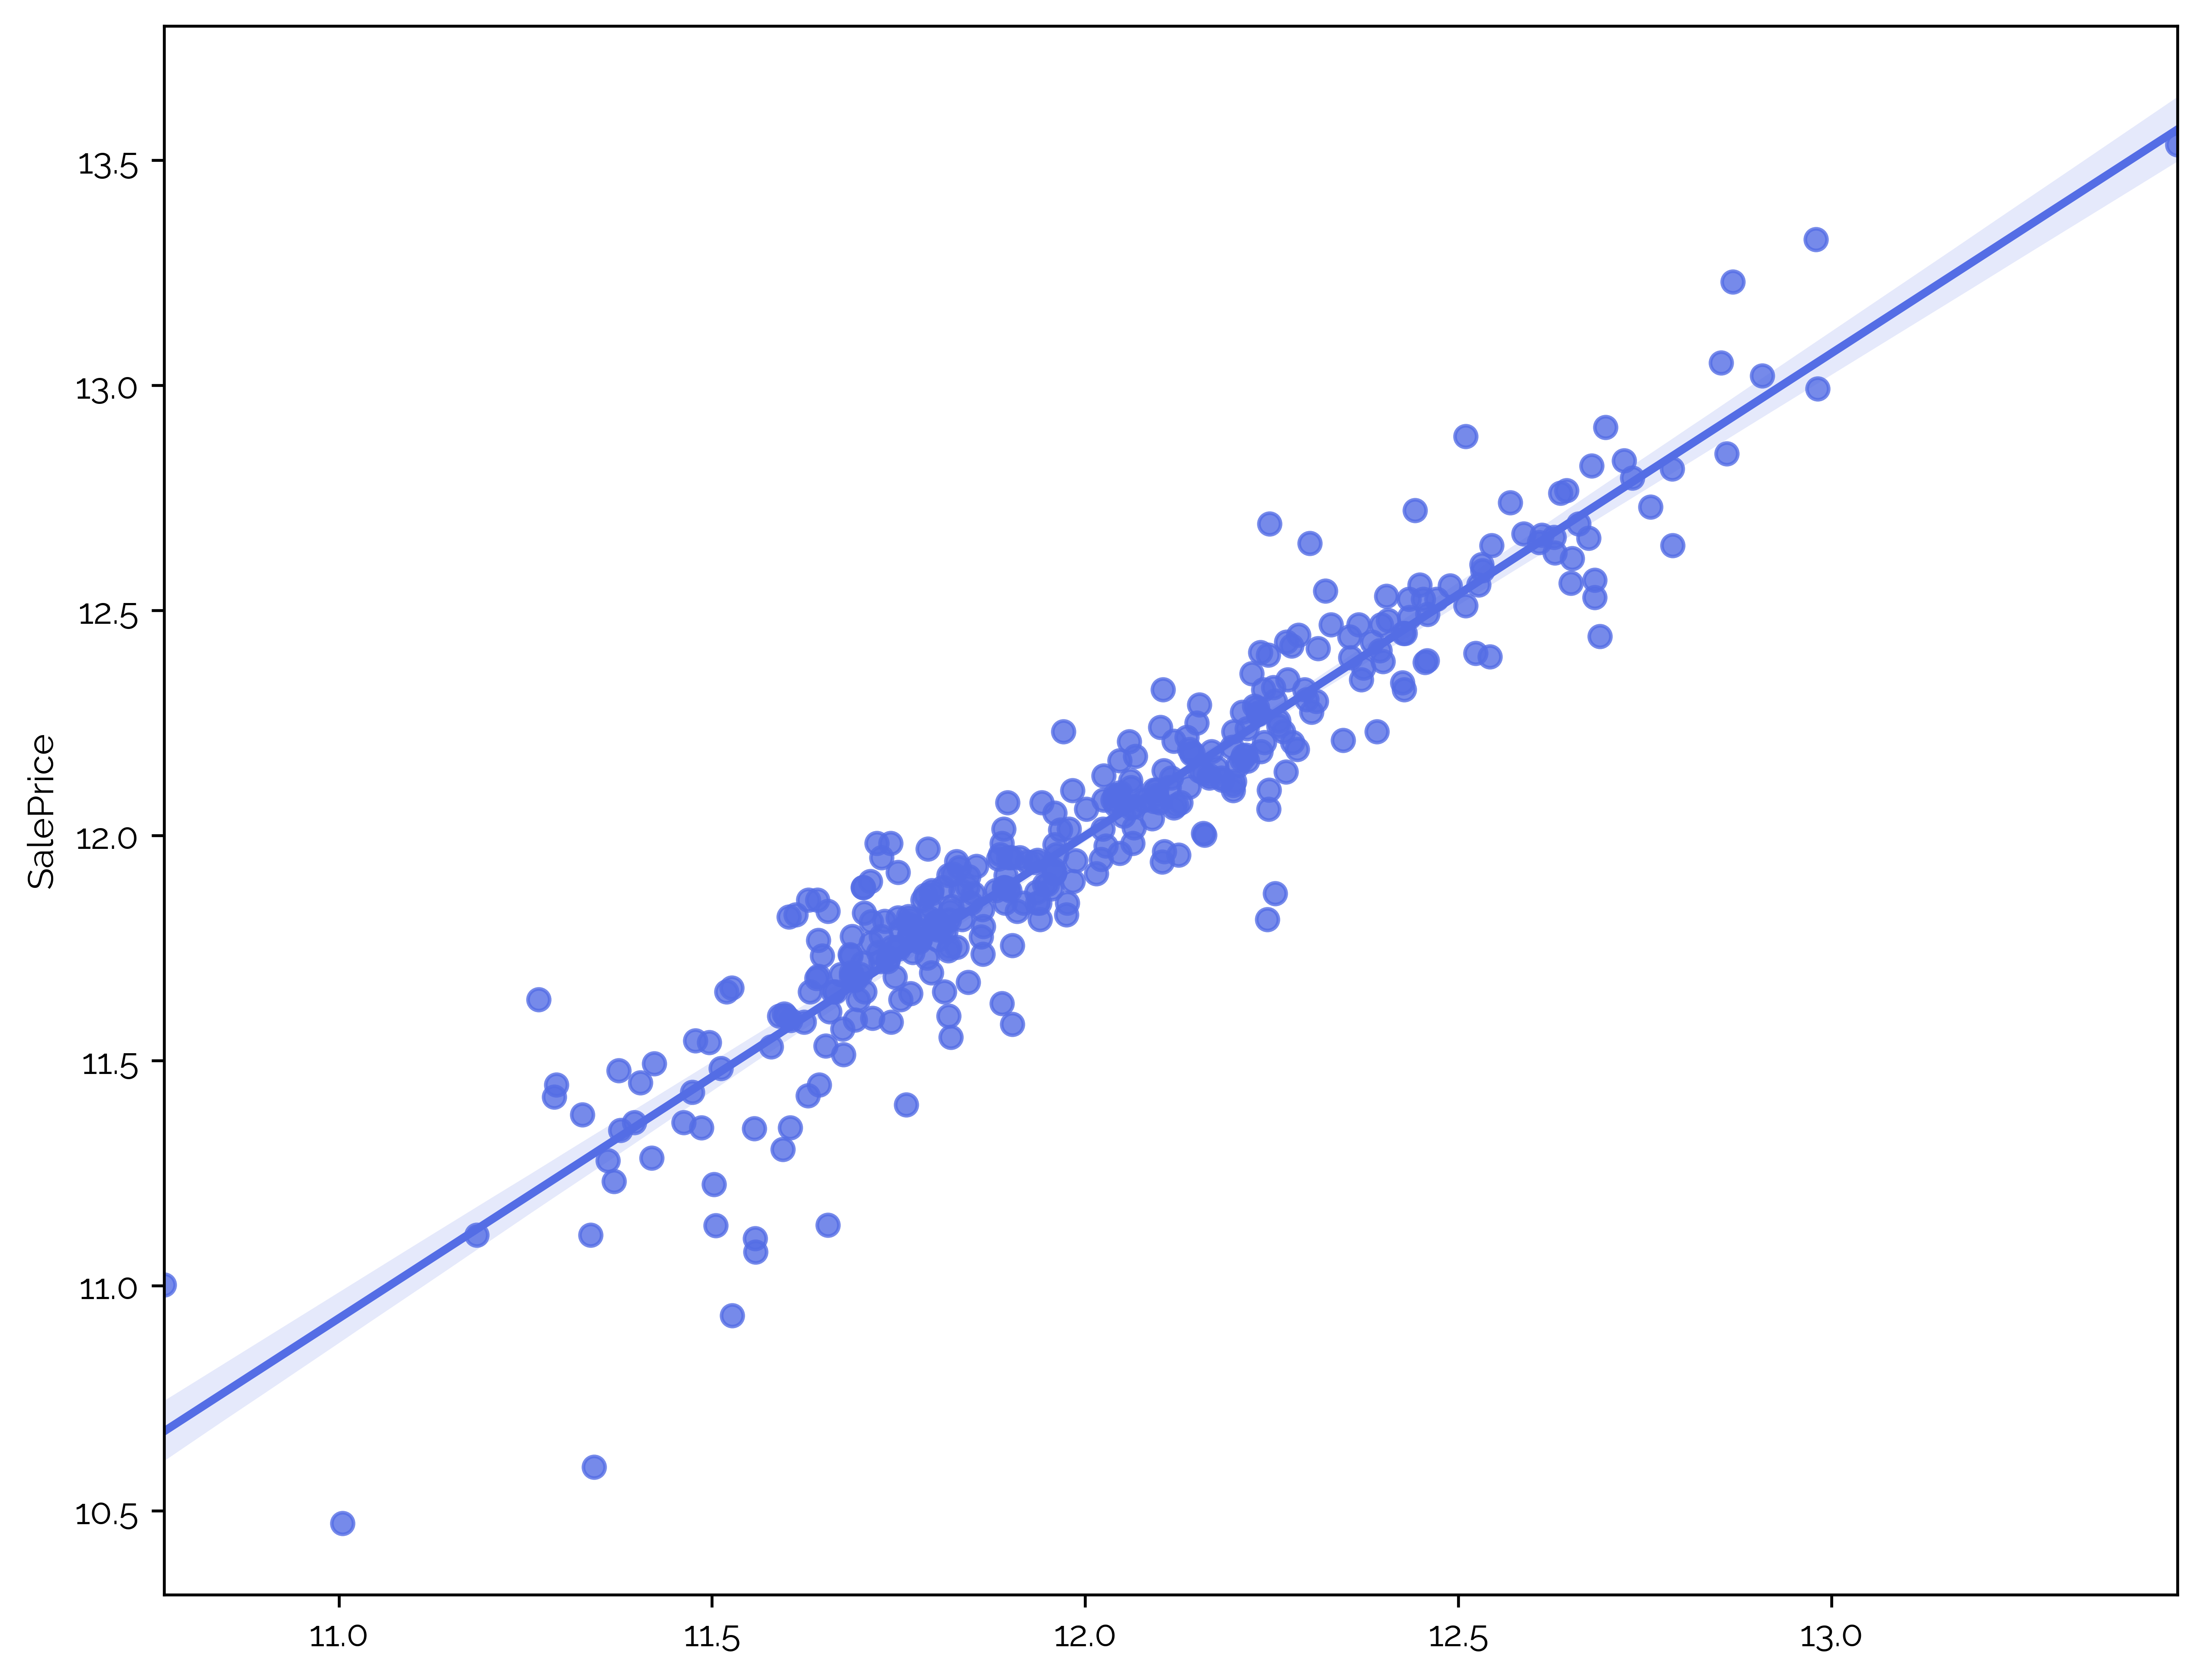

In [57]:
plt.figure(figsize=(10,8))
sns.regplot(Y_pred_poly,y_test)

In [58]:
models = pd.DataFrame({
    'Regression Model': ['Lineal','Ridge','Lasso','Polynomial'],
    'MAE Score': [
        lin_mae,
        ridge_mae, 
        lasso_mae,
        poly_mae ],
    'R2 Score': [
        lin_r2_score,
        ridge_r2_score, 
        lasso_r2_score,
        poly_r2_score   
    ]})
print("--- MODEL EVALUATION---")
models.sort_values(by='MAE Score', ascending=True)

--- MODEL EVALUATION---


Regression Model  MAE Score  R2 Score
3       Polynomial   0.094243  0.889277
1            Ridge   0.100929  0.878792
2            Lasso   0.103357  0.876872
0           Lineal   0.105487  0.870144

# Submit

In [59]:
test = test.dropna()

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[qualitative] = train[qualitative].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

test[qualitative] = test[qualitative].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [61]:
test_id = test['Id']
test = test[features]

In [62]:
test[qualitative] = test[qualitative].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [63]:
test[qualitative].head(5)

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         2       1         3            3          0          4          0   
1         3       1         0            3          0          0          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          4          0   
4         3       1         0            1          0          4          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0            19           1           2         0           2          1   
1            19           2           2         0           2          3   
2            16           2           2         0           4          1   
3            16           2           2         0           4          1   
4             7           2           2         4           2          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         0            6           10           2          3          4   
1         0            7           11           1          3          4   
2         0            6           10           2          3          4   
3         0            6           10           1          3          4   
4         0            2            4           2          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           1         4         4             3             5             3   
1           1         4         4             3             0             6   
2           2         2         4             3             2             6   
3           2         4         4             3             2             6   
4           2         2         4             3             0             6   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        0          4           1           3            3           6   
1        0          4           1           3            2           6   
2        0          2           1           3            3           6   
3        0          0           1           3            2           6   
4        0          0           1           3            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            3           1             2           3           4           2   
1            3           1             2           3           4           2   
2            5           1             0           3           4           2   
3            2           1             0           3           4           2   
4            3           1             1           3           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              4  
4         8              4

In [64]:
percent_missing_data(test)

Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []

In [65]:
test = scaler.transform(test)

In [66]:
poly_features_test_subm = polynomial_converter.fit_transform(test)
y_pred = elastic_model.predict(poly_features_test_subm)

In [67]:
y_pred = np.exp(y_pred) - np.ones(len(y_pred))

In [69]:
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
my_submission.to_csv("submission.csv", index=False)